# Visualizing RBC Demographic Variables

*Examining range, minimum and maximum values via boxplots*

*Examining distribution and frequency via histograms*

In [153]:
import warnings
import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import numpy as np

# Define some general settings
pd.DataFrame.iteritems = pd.DataFrame.items
warnings.filterwarnings('ignore')
sns.set_theme(style='ticks')

In [154]:
# Let's read in our data
list_of_demographic_tsvs = sorted(glob.glob("*participants*tsv"))
print (list_of_demographic_tsvs)


['study-BHRC_desc-participants.tsv', 'study-CCNP_desc-participants.tsv', 'study-HBN_desc-participants.tsv', 'study-NKI_desc-participants.tsv', 'study-PNC_desc-participants.tsv']


Examining available variables:

In [155]:
dfs = [pd.read_table(f) for f in list_of_demographic_tsvs]
df = pd.concat(dfs, axis=0)
df = df.reset_index(drop=True)
print(df.columns.tolist())

['participant_id', 'session', 'study', 'study_site', 'wave', 'age', 'sex', 'race', 'ethnicity', 'bmi', 'handedness', 'participant_education', 'parent_1_education', 'parent_2_education', 'p_factor_mcelroy_harmonized_all_samples', 'internalizing_mcelroy_harmonized_all_samples', 'externalizing_mcelroy_harmonized_all_samples', 'attention_mcelroy_harmonized_all_samples', 'cubids_acquisition_group']


Variables of interest here are the age, sex, race, ethnicity, bmi, handedness, participant educatoin, parental education and p-factors. 

Cleaning the dataset to ensure we only have the necessary information:


In [156]:
df = df[
    [
        'participant_id',
        'study',
        'age',
        'sex',
        'race',
        'ethnicity',
        'bmi',
        'handedness',
        'participant_education',
        'parent_1_education',
        'parent_2_education',
        'p_factor_mcelroy_harmonized_all_samples',
        'internalizing_mcelroy_harmonized_all_samples',
        'externalizing_mcelroy_harmonized_all_samples',
        'attention_mcelroy_harmonized_all_samples',
    ]
]
# Rename "Colornest" study to "CCNP"
df['study'] = df['study'].replace({'Colornest': 'CCNP'})
pal = sns.cubehelix_palette(len(df['study'].unique()), rot=-0.5, light=0.9)

## Visualizing the variables

### 1. Age
#### Range

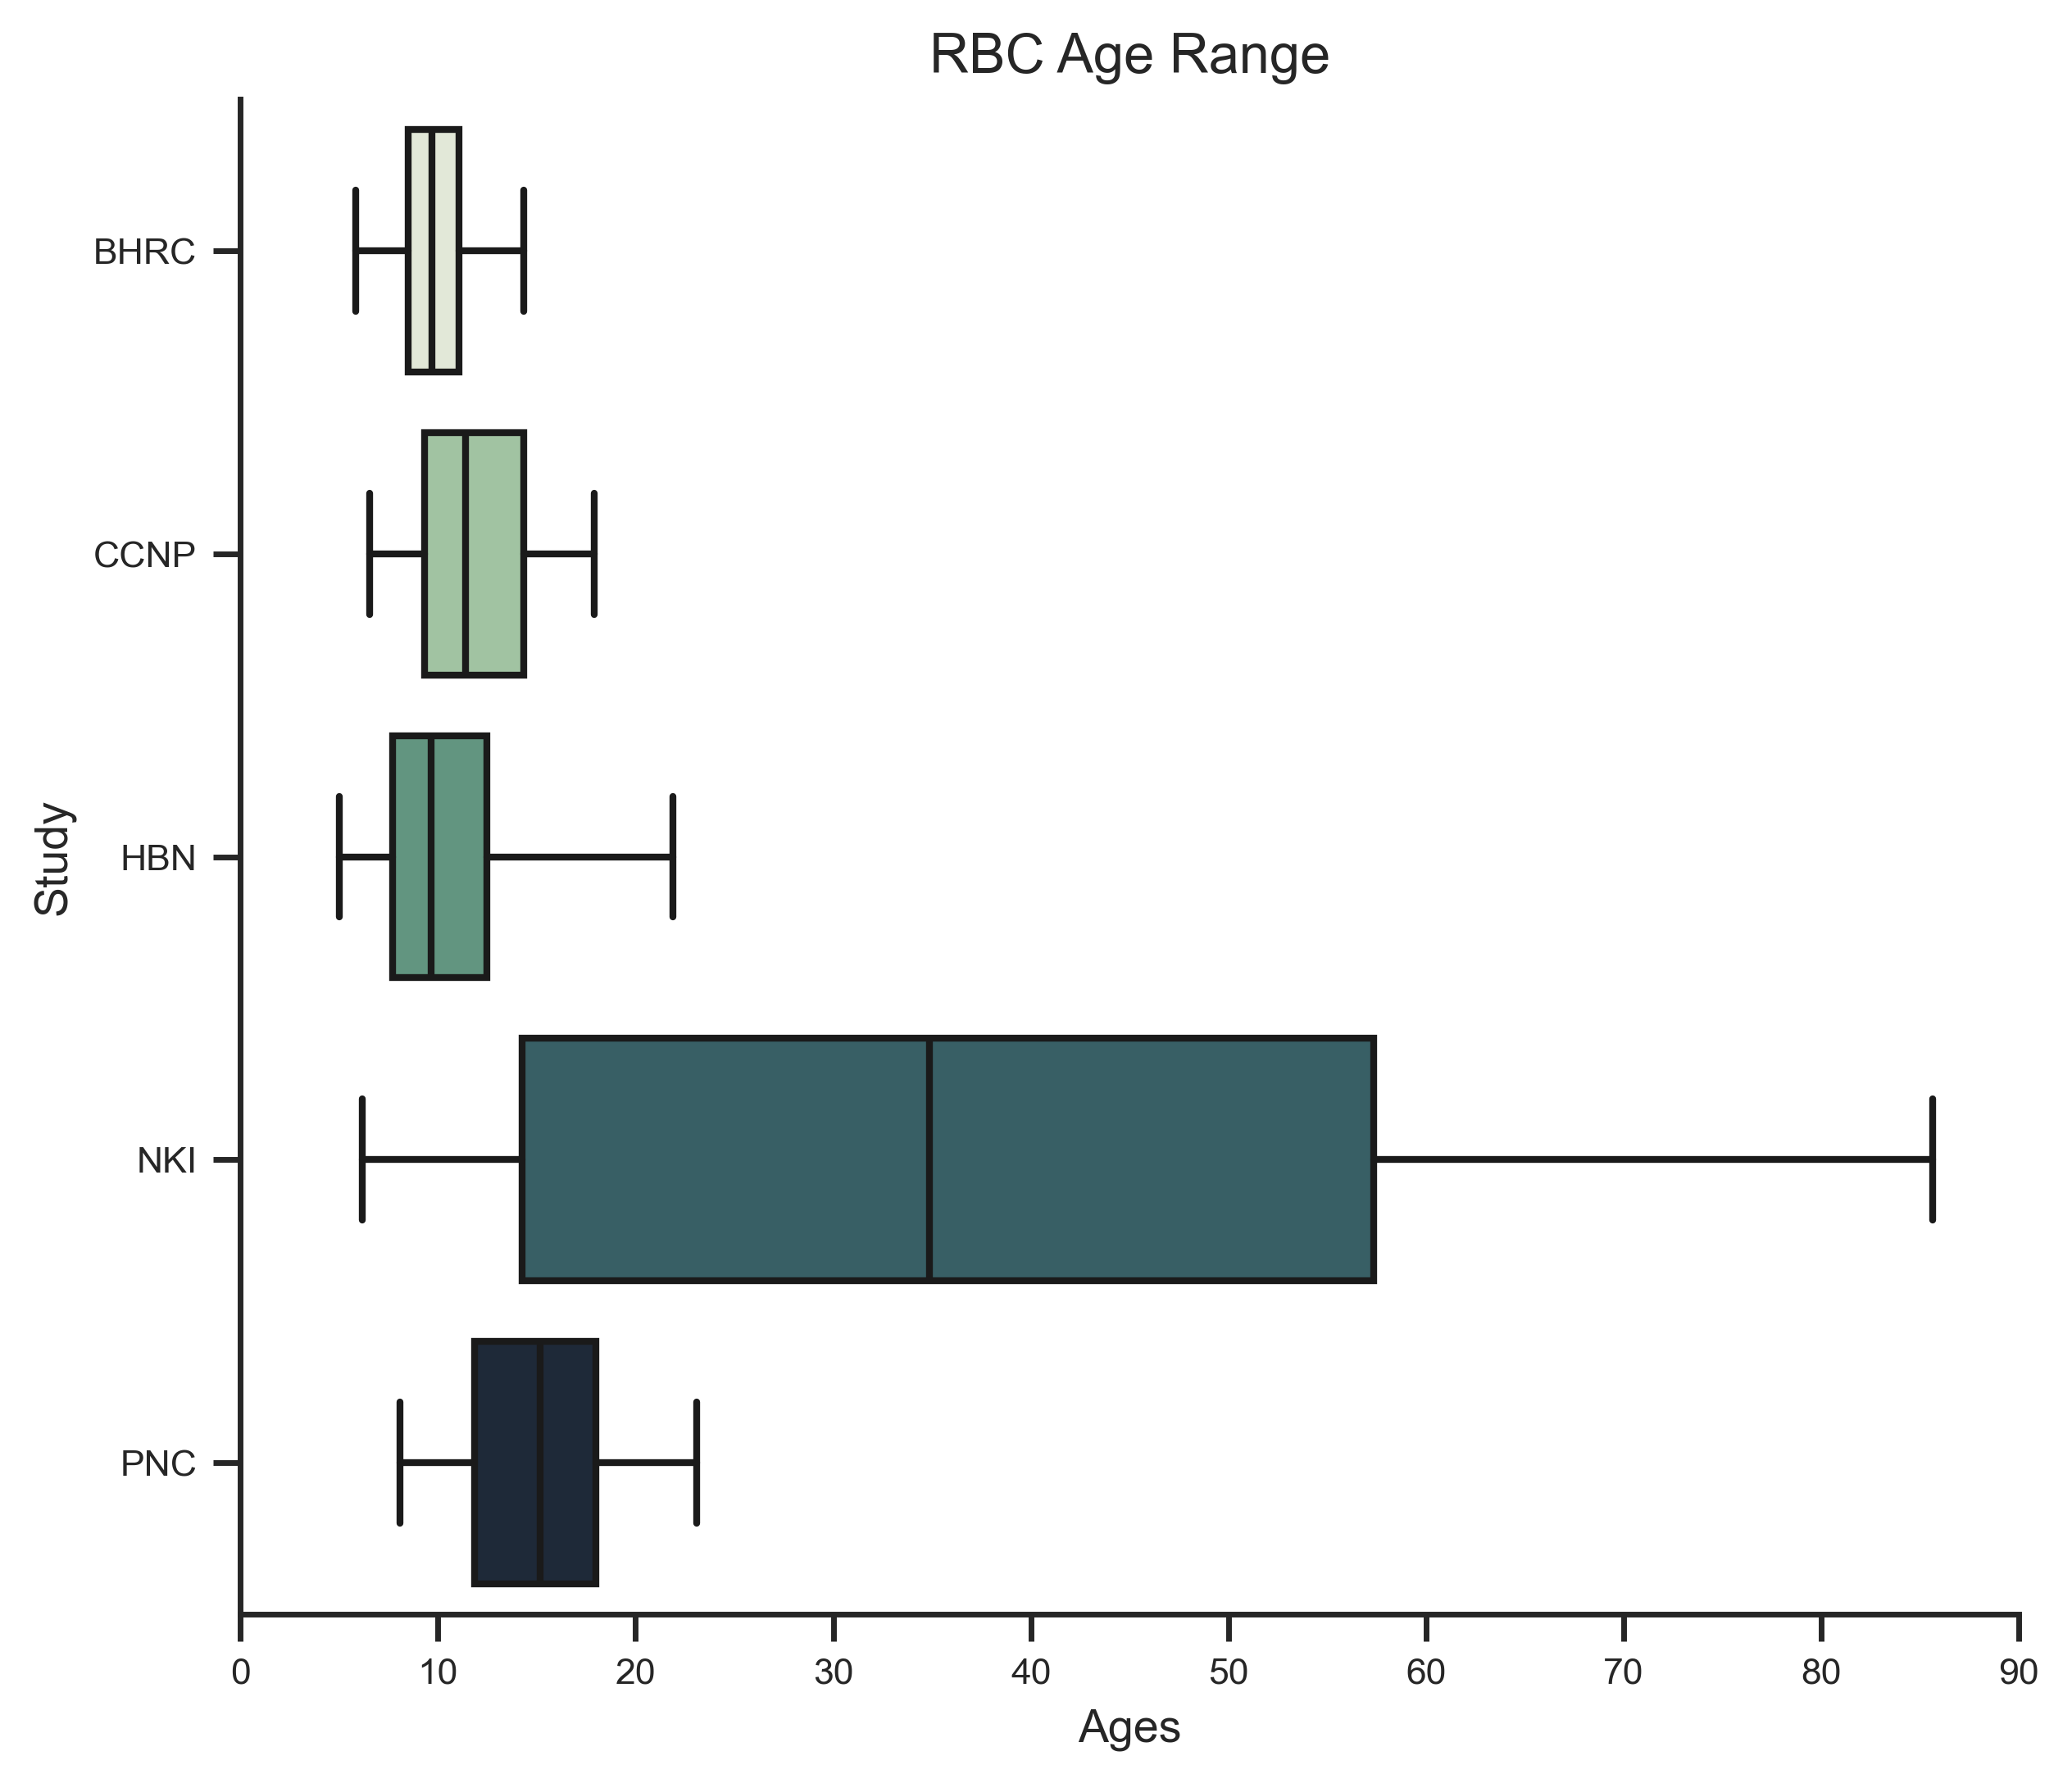

In [157]:
fig, ax = plt.subplots(figsize=(7, 6), dpi=400)

sns.boxplot(
    data=df,
    x='age',
    y='study',
    whis=[0, 100],
    width=.8,
    palette=pal,
    fliersize=8,
    ax=ax,
)

# Tweak the visual presentation
ax.set_ylabel('')
ax.set_title('RBC Age Range', fontsize=12)
ax.set_xlabel('Ages', fontsize=10)
ax.set_ylabel('Study', fontsize=10)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
fig.show()

#### Distribution

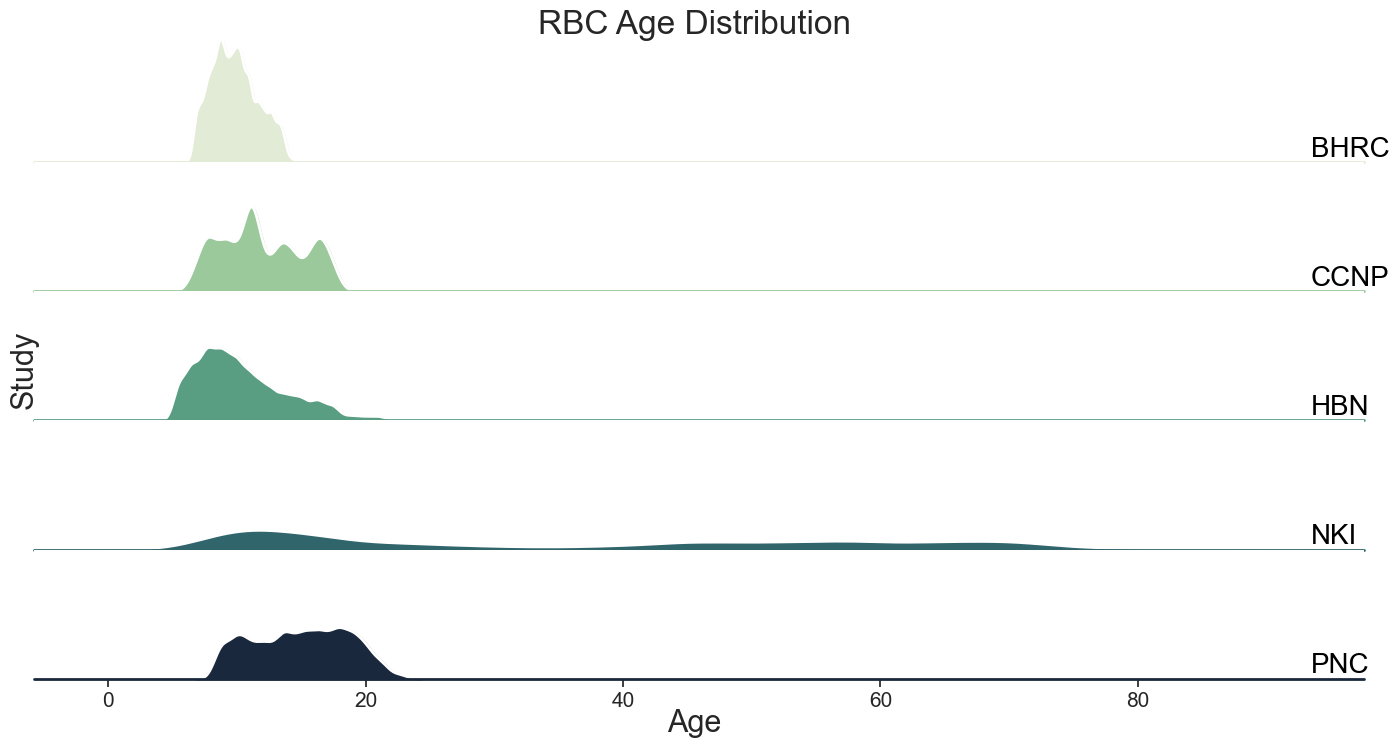

In [158]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row='study', hue='study', aspect=9.5, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    'age',
    bw_adjust=.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(sns.kdeplot, 'age', clip_on=False, color='w', lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.map(plt.axhline, y=0, linewidth=2, linestyle='-', color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.96,
        0.1,
        label,
        color='black',
        size=20,
        ha='left',
        va='center',
        transform=ax.transAxes,
    )

g.map(label, 'age')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set(title='', yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
g.fig.suptitle('RBC Age Distribution', fontsize=24)
g.fig.supylabel('Study', fontsize=22)
g.fig.supxlabel('Age', fontsize=22)
plt.xticks(fontsize=15)
plt.show()

### 2. Sex
#### Distribution

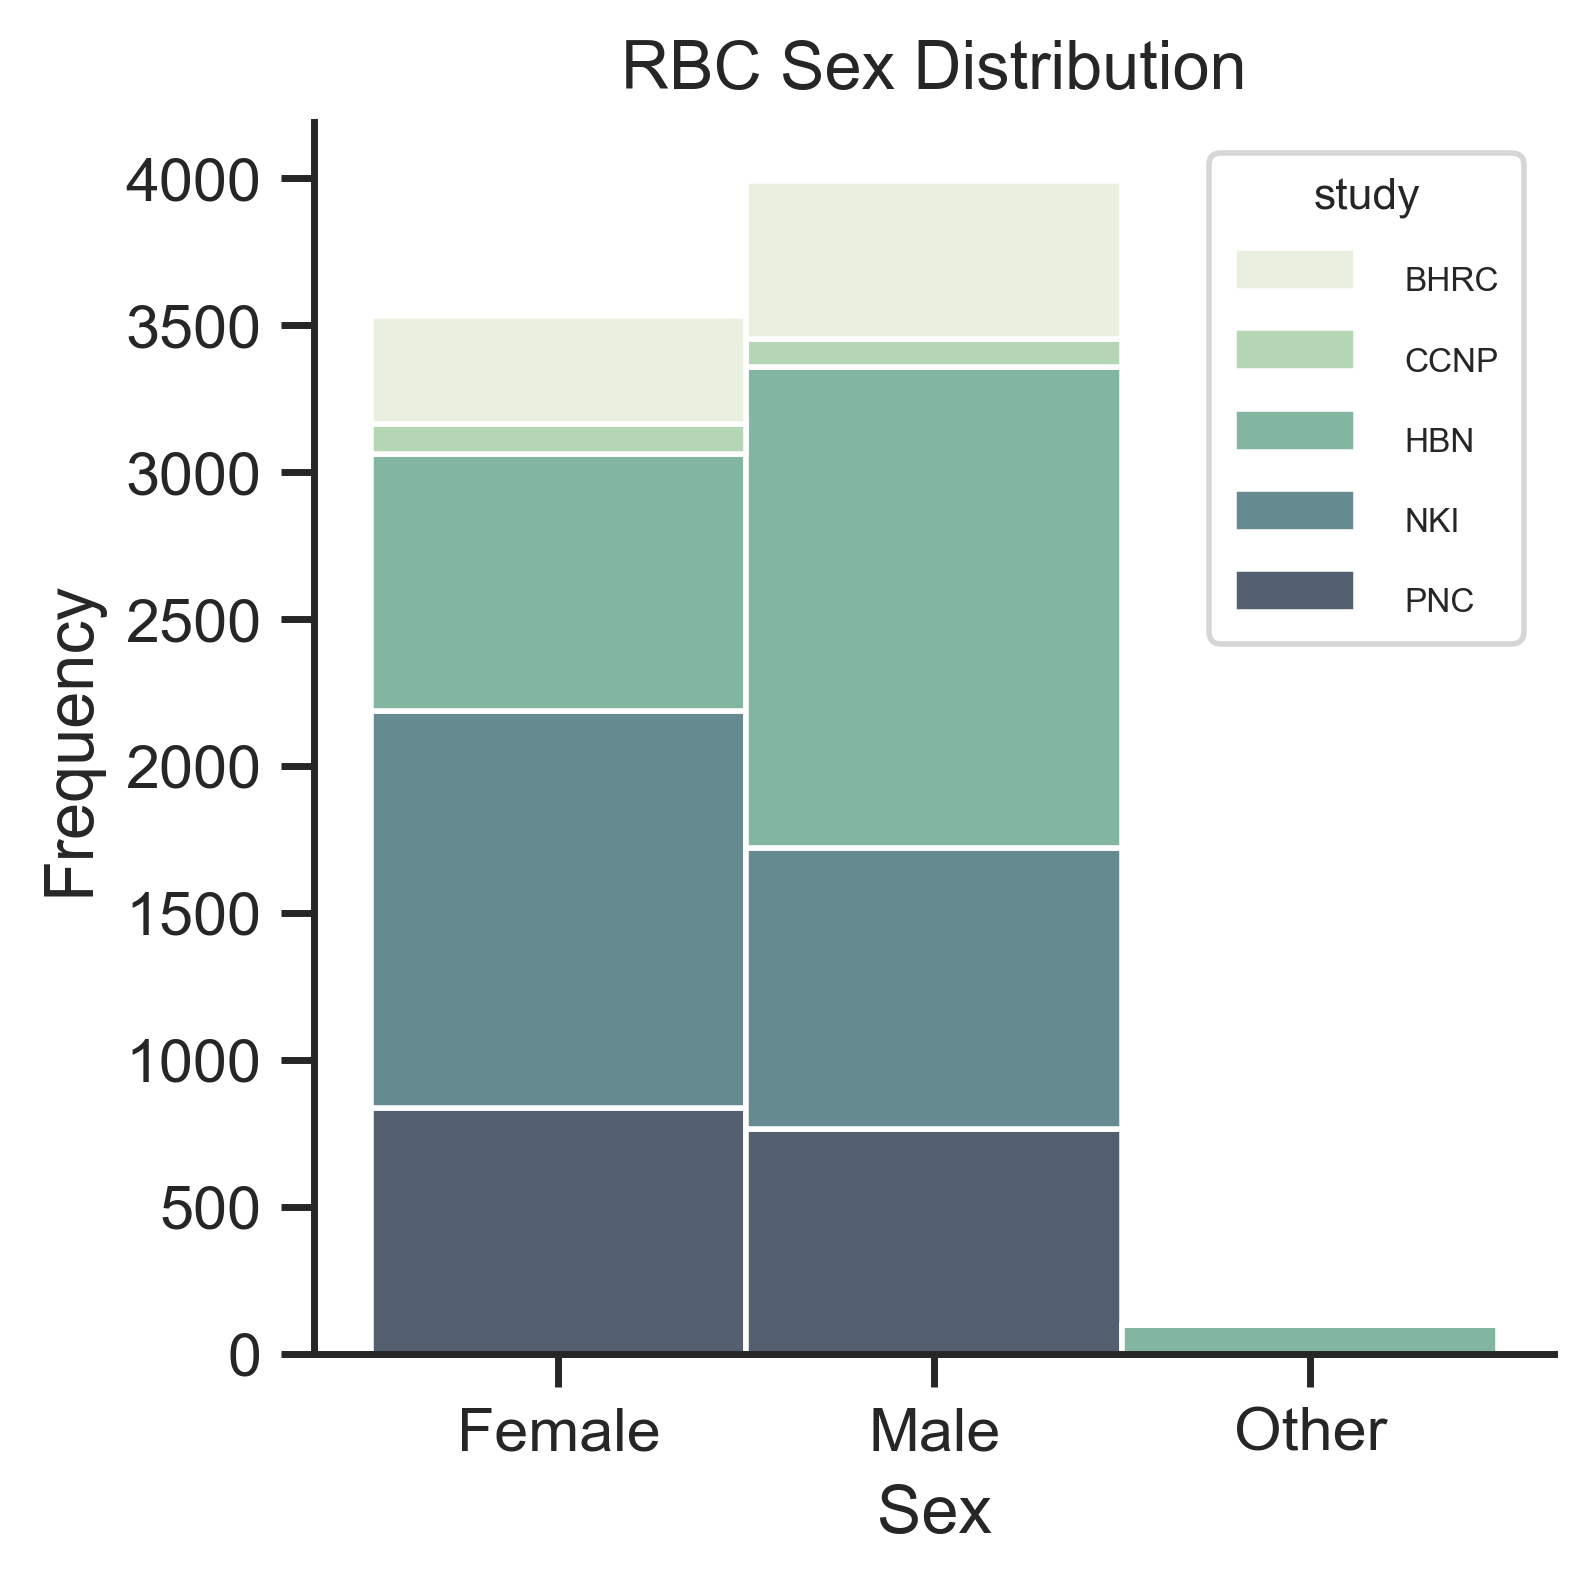

In [159]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=400)
df['sex'] = pd.Categorical(df['sex'], ['Female','Male','Other'])
x = sns.histplot(
    df,
    x='sex',
    hue='study',
    multiple='stack',
    palette=pal,
    ax=ax,
)
sns.despine(trim=False)
ax.set(xlabel='Sex', ylabel='Frequency', title='RBC Sex Distribution')
legend = ax.get_legend()
legend.get_title().set_fontsize(8)
for text in legend.texts:
    text.set_fontsize(6)

fig.show()

### 3. Race
#### Distribution

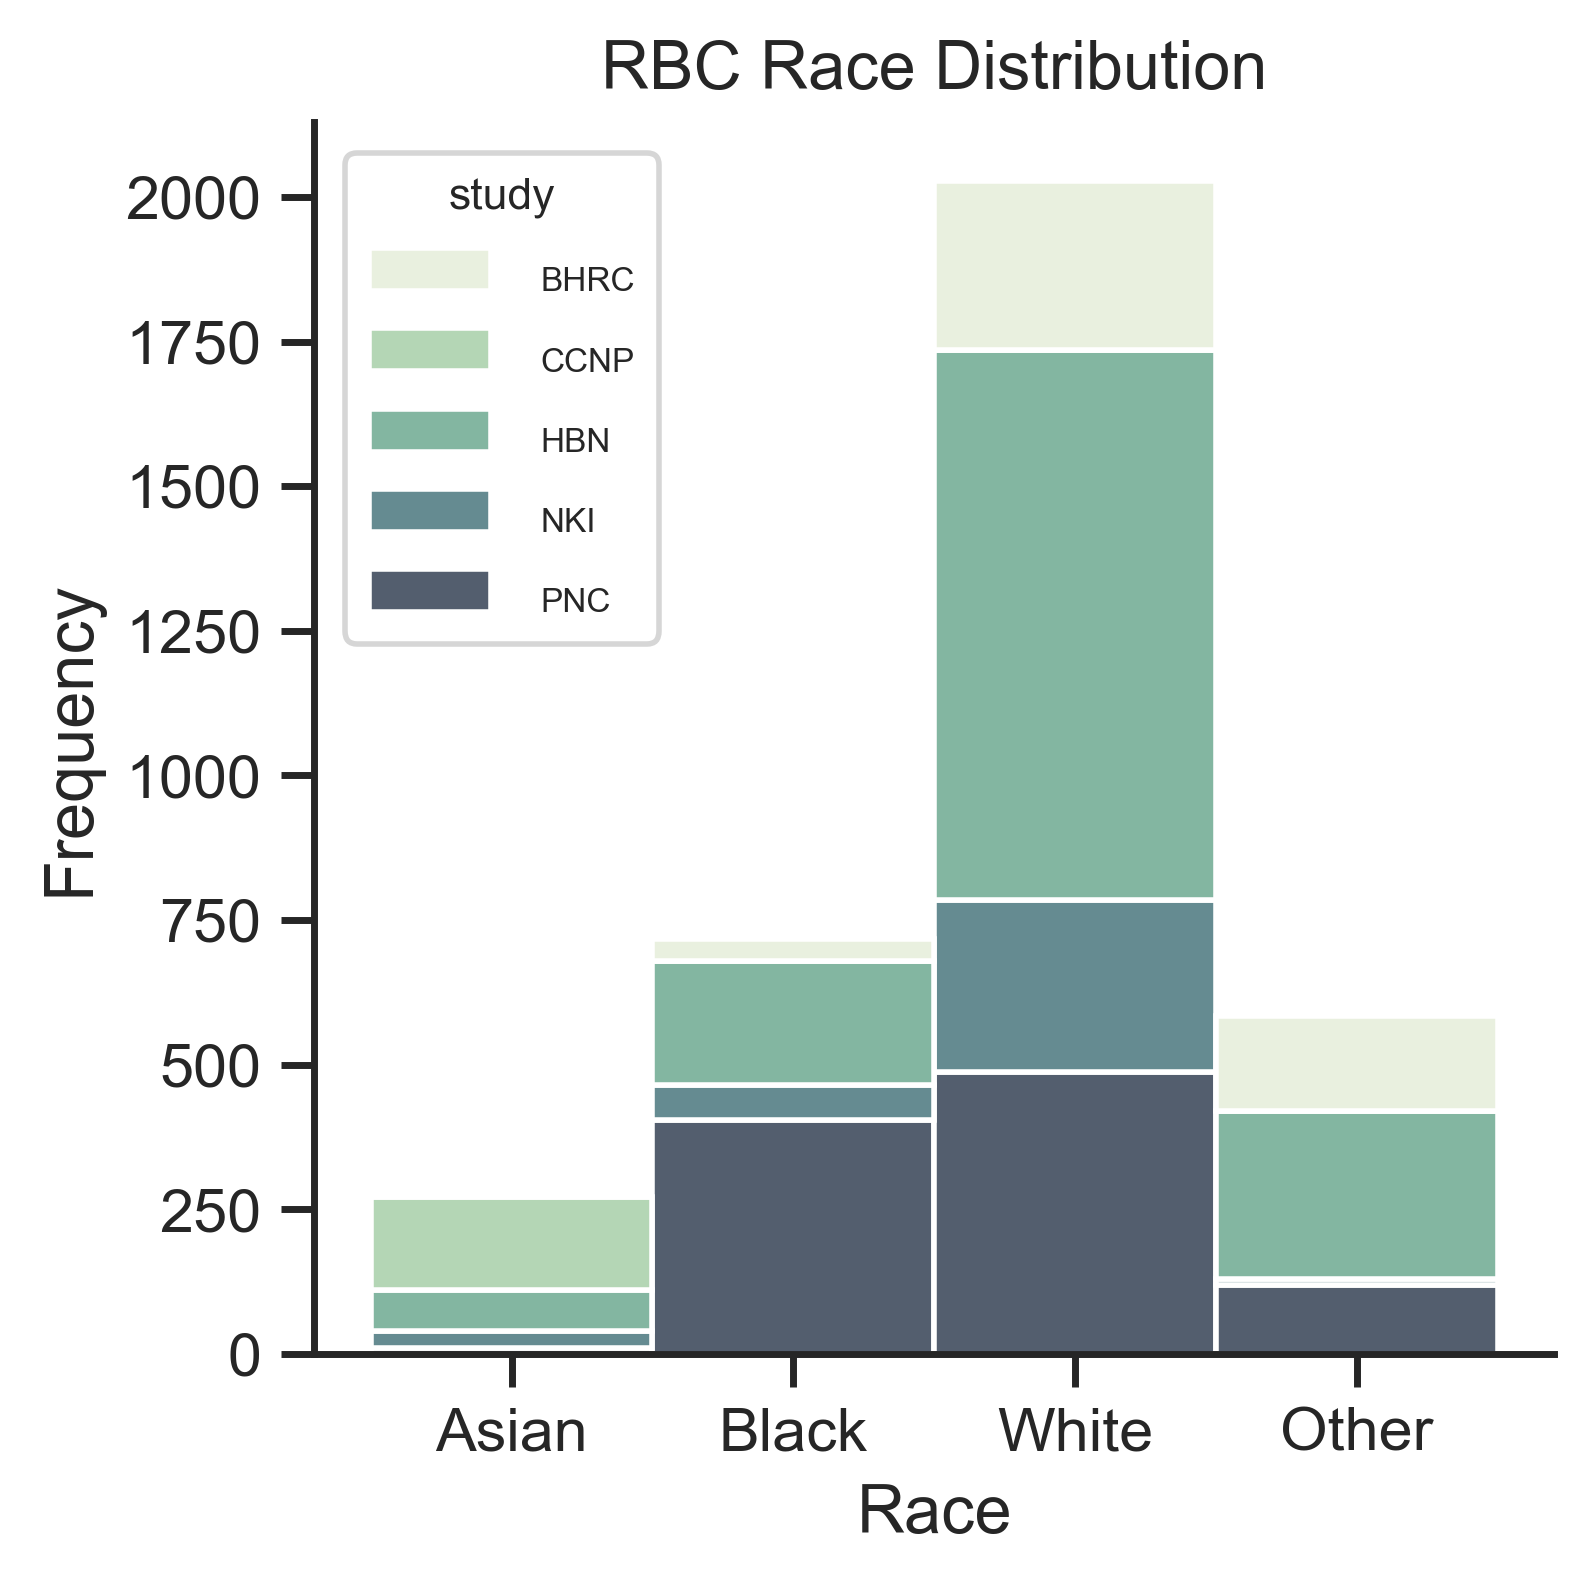

In [160]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=400)
df['race'] = pd.Categorical(df['race'], ['Asian','Black','White','Other'])

x = sns.histplot(
    df.dropna(),
    x='race',
    hue='study',
    multiple='stack',
    palette=pal,
    ax=ax,
)
sns.despine(trim=False)
ax.set(xlabel='Race', ylabel='Frequency', title='RBC Race Distribution')
legend = ax.get_legend()
legend.get_title().set_fontsize(8)
for text in legend.texts:
    text.set_fontsize(6)

fig.show()

### 4. Ethnicity
#### Distribution

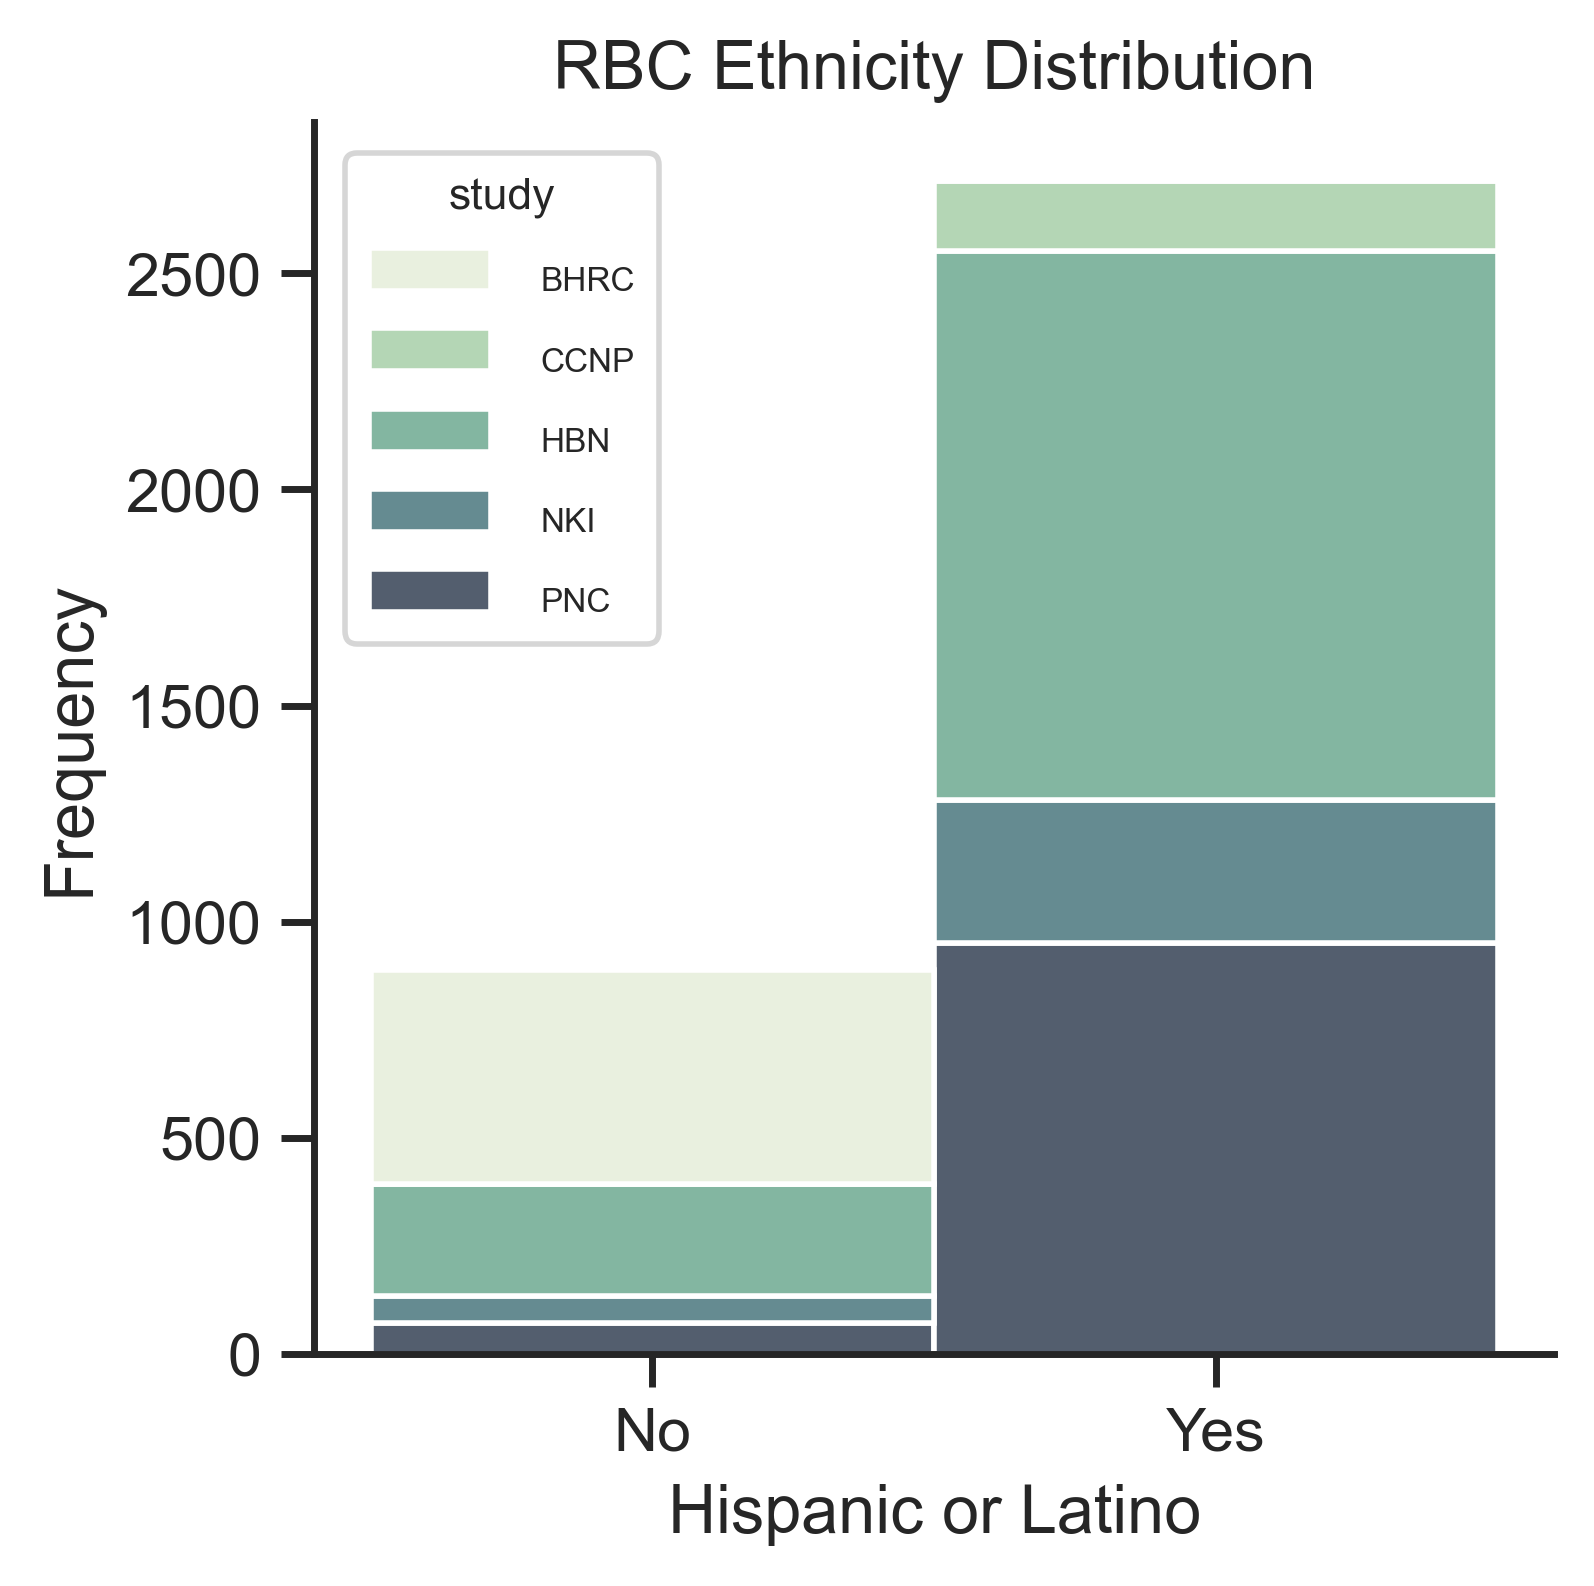

In [161]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=400)
x = sns.histplot(
    df.dropna(),
    x='ethnicity',
    hue='study',
    multiple='stack',
    palette=pal,
    ax=ax,
)
sns.despine(trim=False)
ax.set(xlabel='Hispanic or Latino', ylabel='Frequency', title='RBC Ethnicity Distribution')

plt.xticks(np.arange(0, 1, step=0.2)) 
plt.xticks(np.arange(2), ['No', 'Yes'])

legend = ax.get_legend()
legend.get_title().set_fontsize(8)
for text in legend.texts:
    text.set_fontsize(6)

fig.show()

### 5. BMI
#### Range

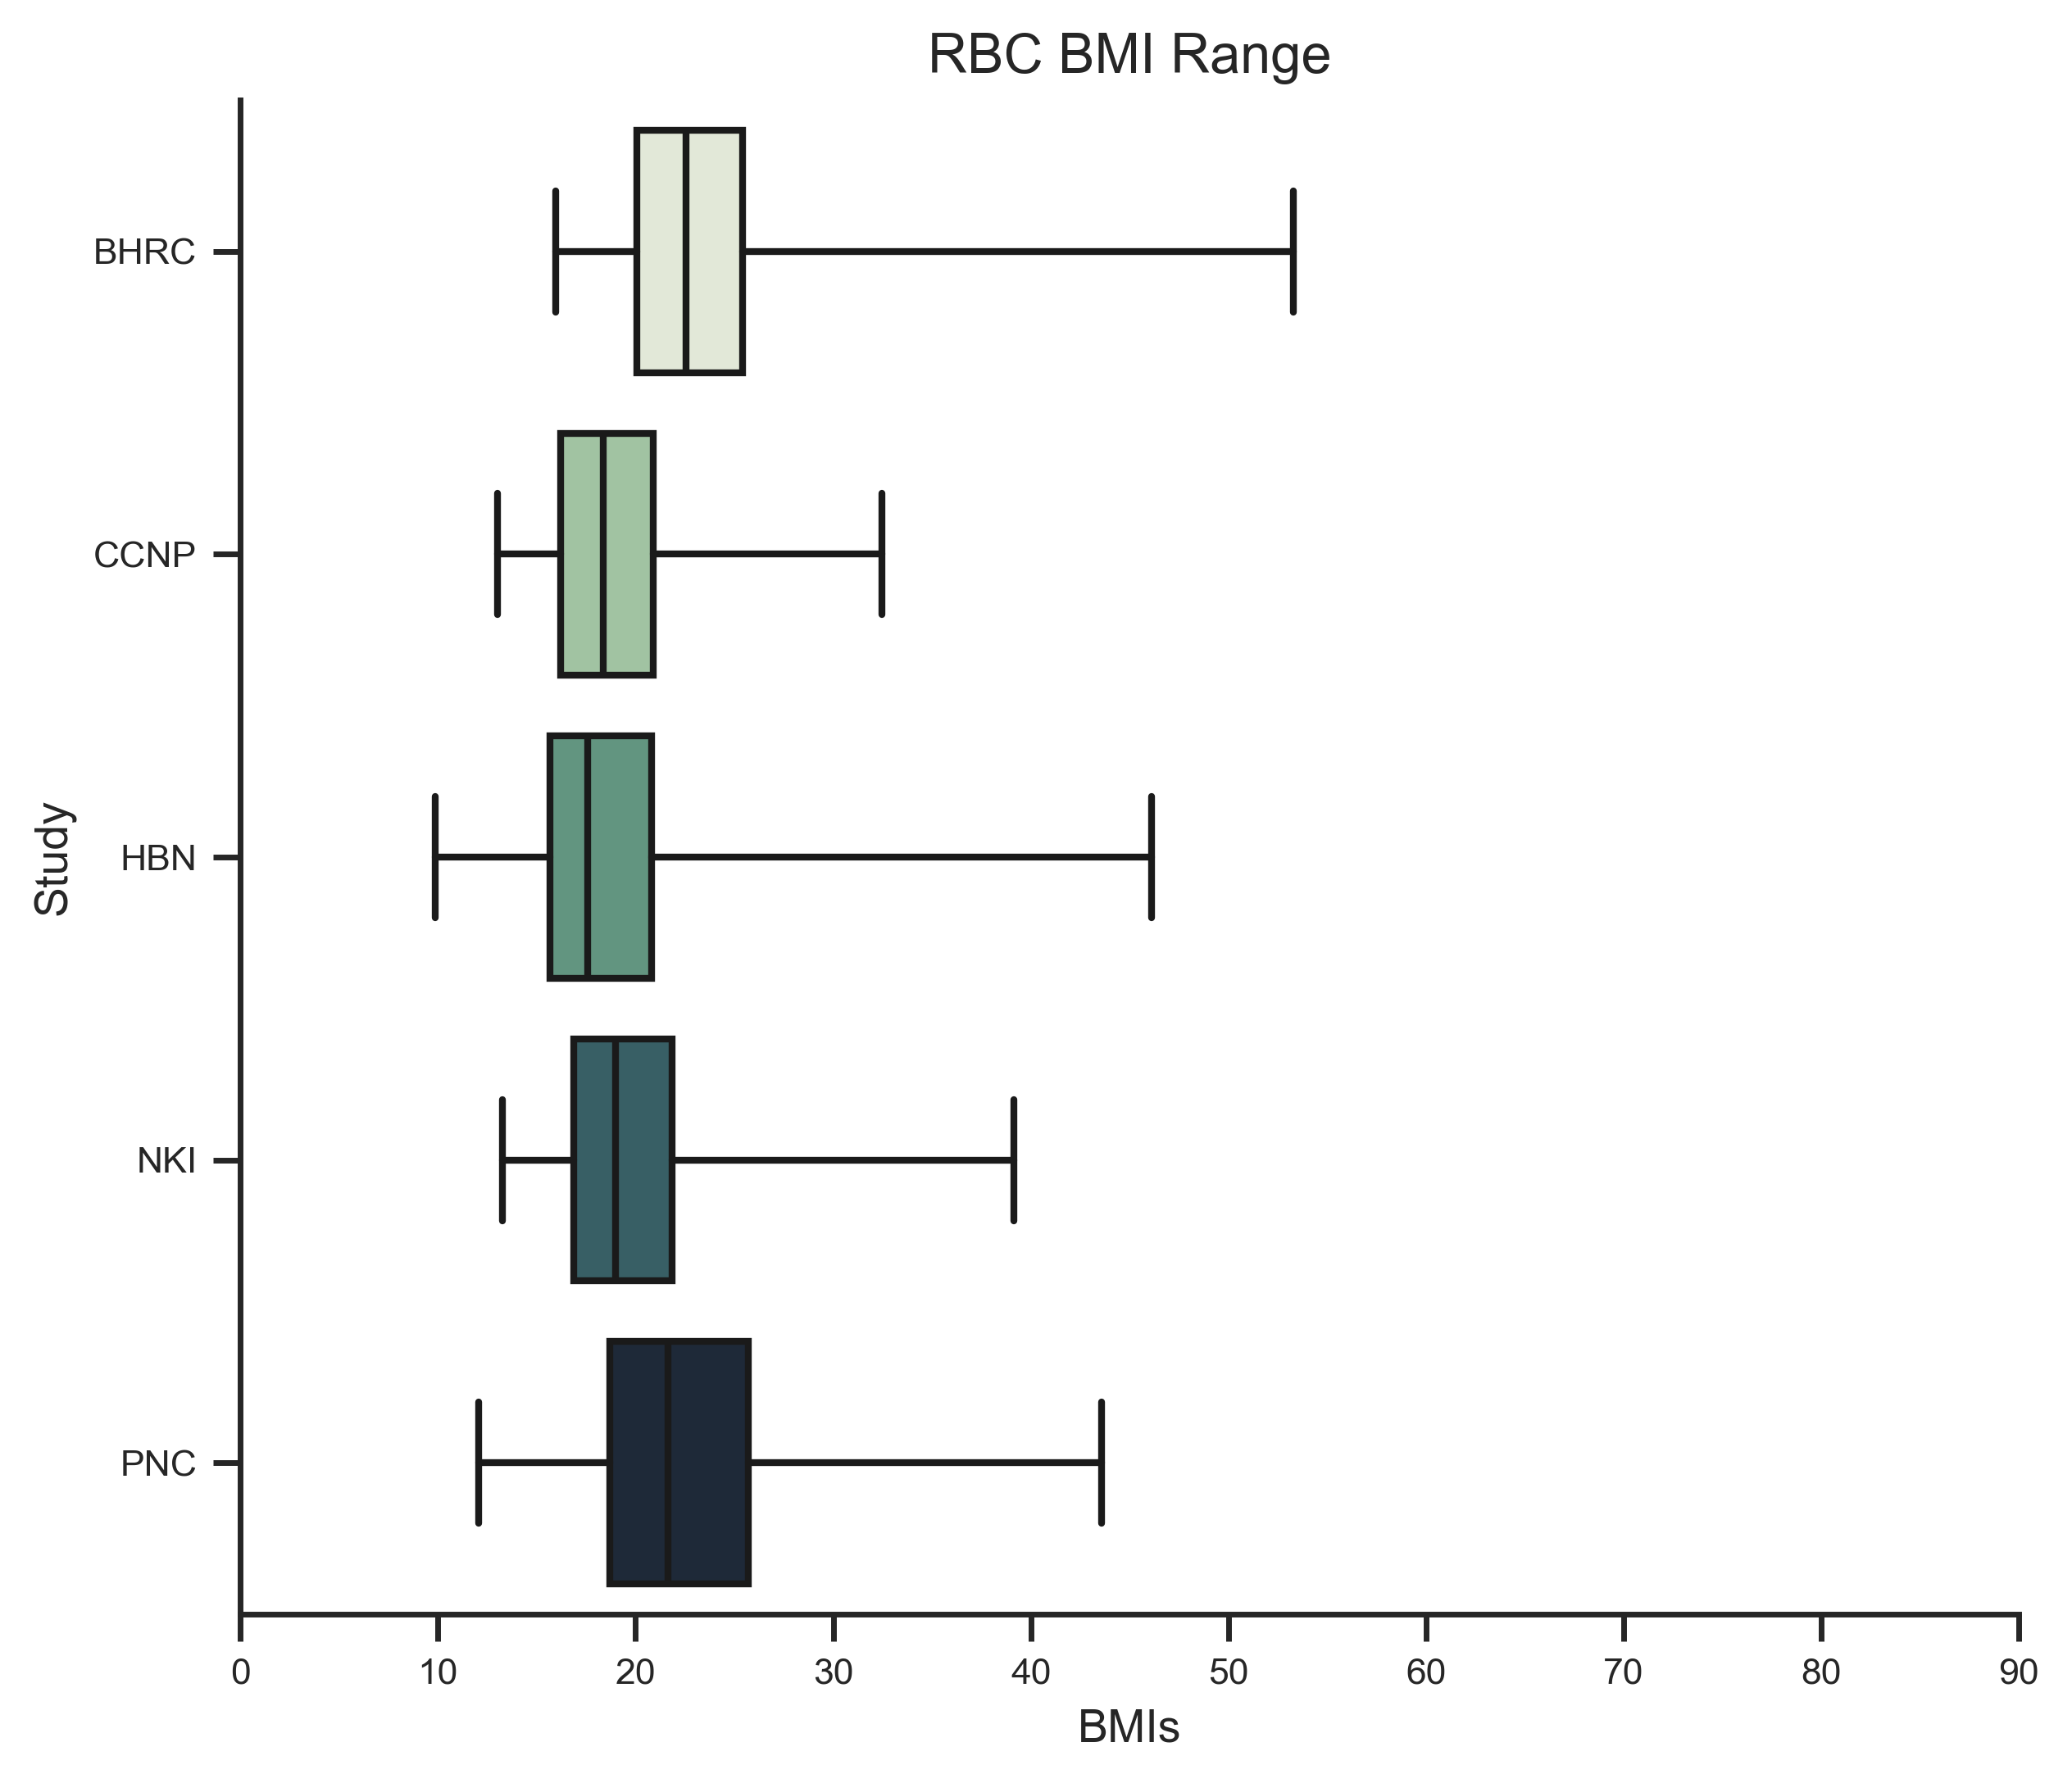

In [162]:
fig, ax = plt.subplots(figsize=(7, 6), dpi=400)

sns.boxplot(
    data=df.dropna(),
    x='bmi',
    y='study',
    whis=[0, 100],
    width=.8,
    palette=pal,
    fliersize=8,
    ax=ax,
)

# Tweak the visual presentation
ax.set_ylabel('')
ax.set_title('RBC BMI Range', fontsize=12)
ax.set_xlabel('BMIs', fontsize=10)
ax.set_ylabel('Study', fontsize=10)
ax.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
fig.show()

#### Distribution

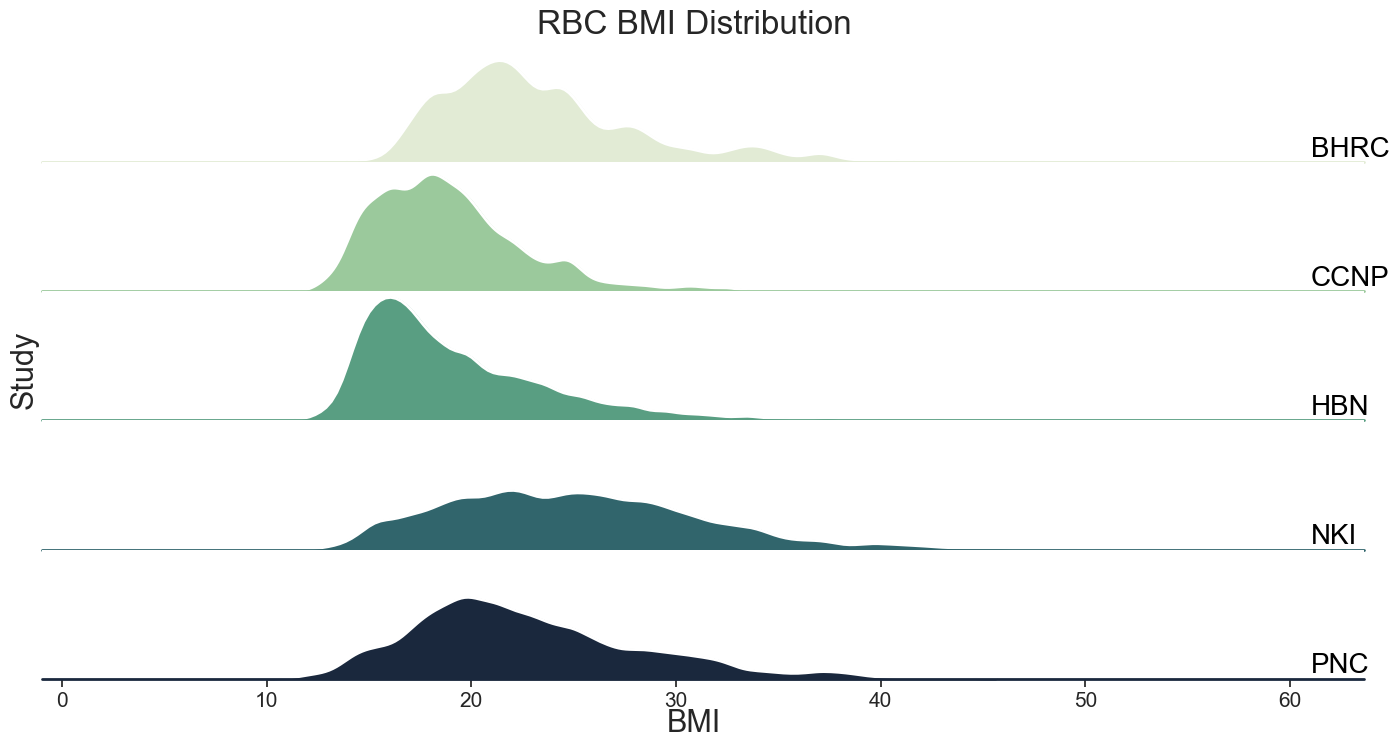

In [163]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row='study', hue='study', aspect=9.5, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    'bmi',
    bw_adjust=.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(sns.kdeplot, 'bmi', clip_on=False, color='w', lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.map(plt.axhline, y=0, linewidth=2, linestyle='-', color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.96,
        0.1,
        label,
        color='black',
        size=20,
        ha='left',
        va='center',
        transform=ax.transAxes,
    )

g.map(label, 'bmi')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set(title='', yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
g.fig.suptitle('RBC BMI Distribution', fontsize=24)
g.fig.supylabel('Study', fontsize=22)
g.fig.supxlabel('BMI', fontsize=22)
plt.xticks(fontsize=15)
plt.show()

### 6. Handedness
#### Distribution

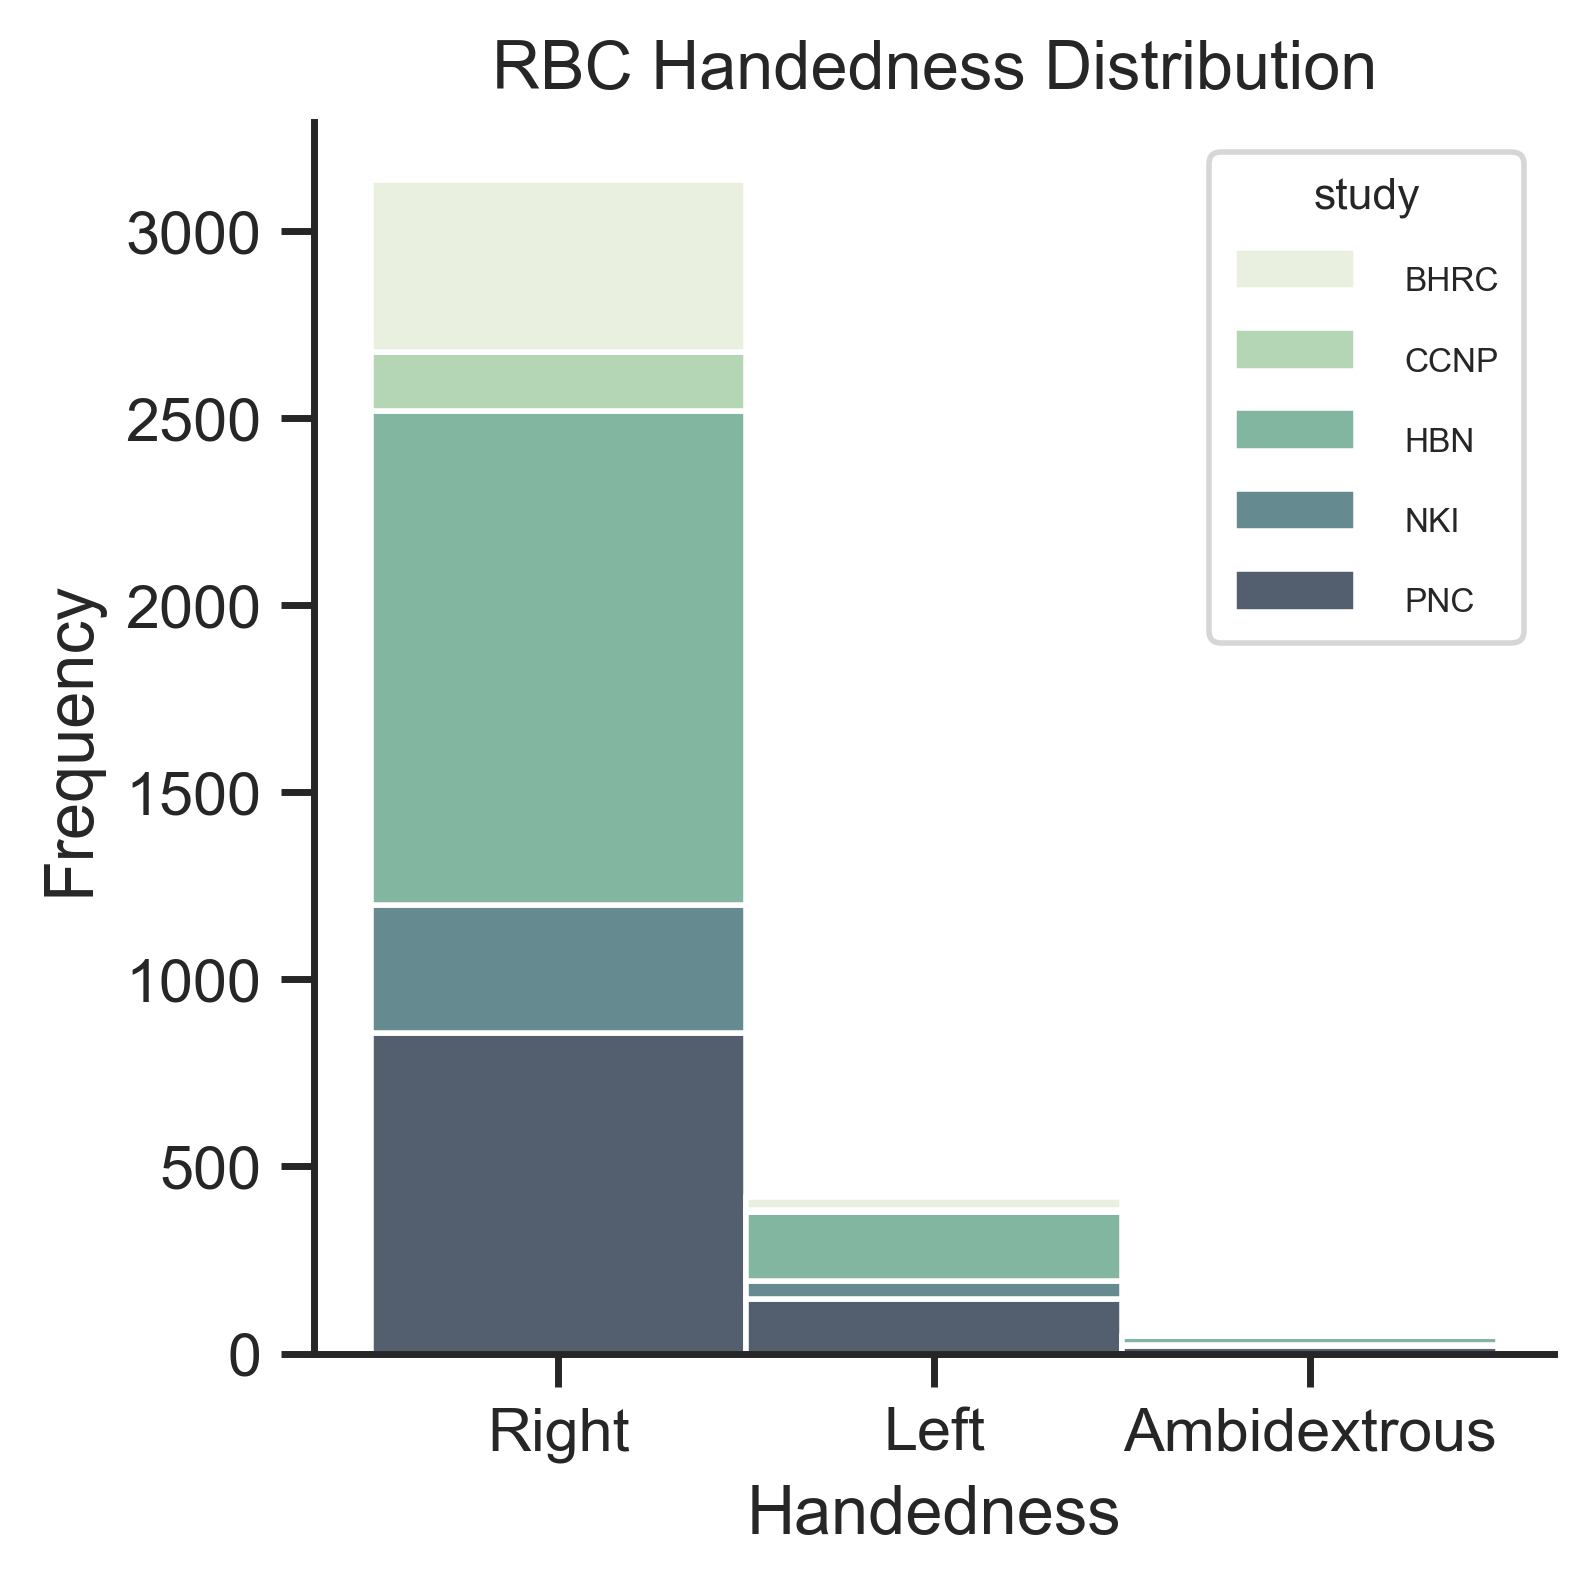

In [164]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=400)
x = sns.histplot(
    df.dropna(),
    x='handedness',
    hue='study',
    multiple='stack',
    palette=pal[0:5],
    ax=ax,
)
sns.despine(trim=False)
ax.set(xlabel='Handedness', ylabel='Frequency', title='RBC Handedness Distribution')
legend = ax.get_legend()
legend.get_title().set_fontsize(8)
for text in legend.texts:
    text.set_fontsize(6)

fig.show()

### 7. Participant Education
#### Distribution

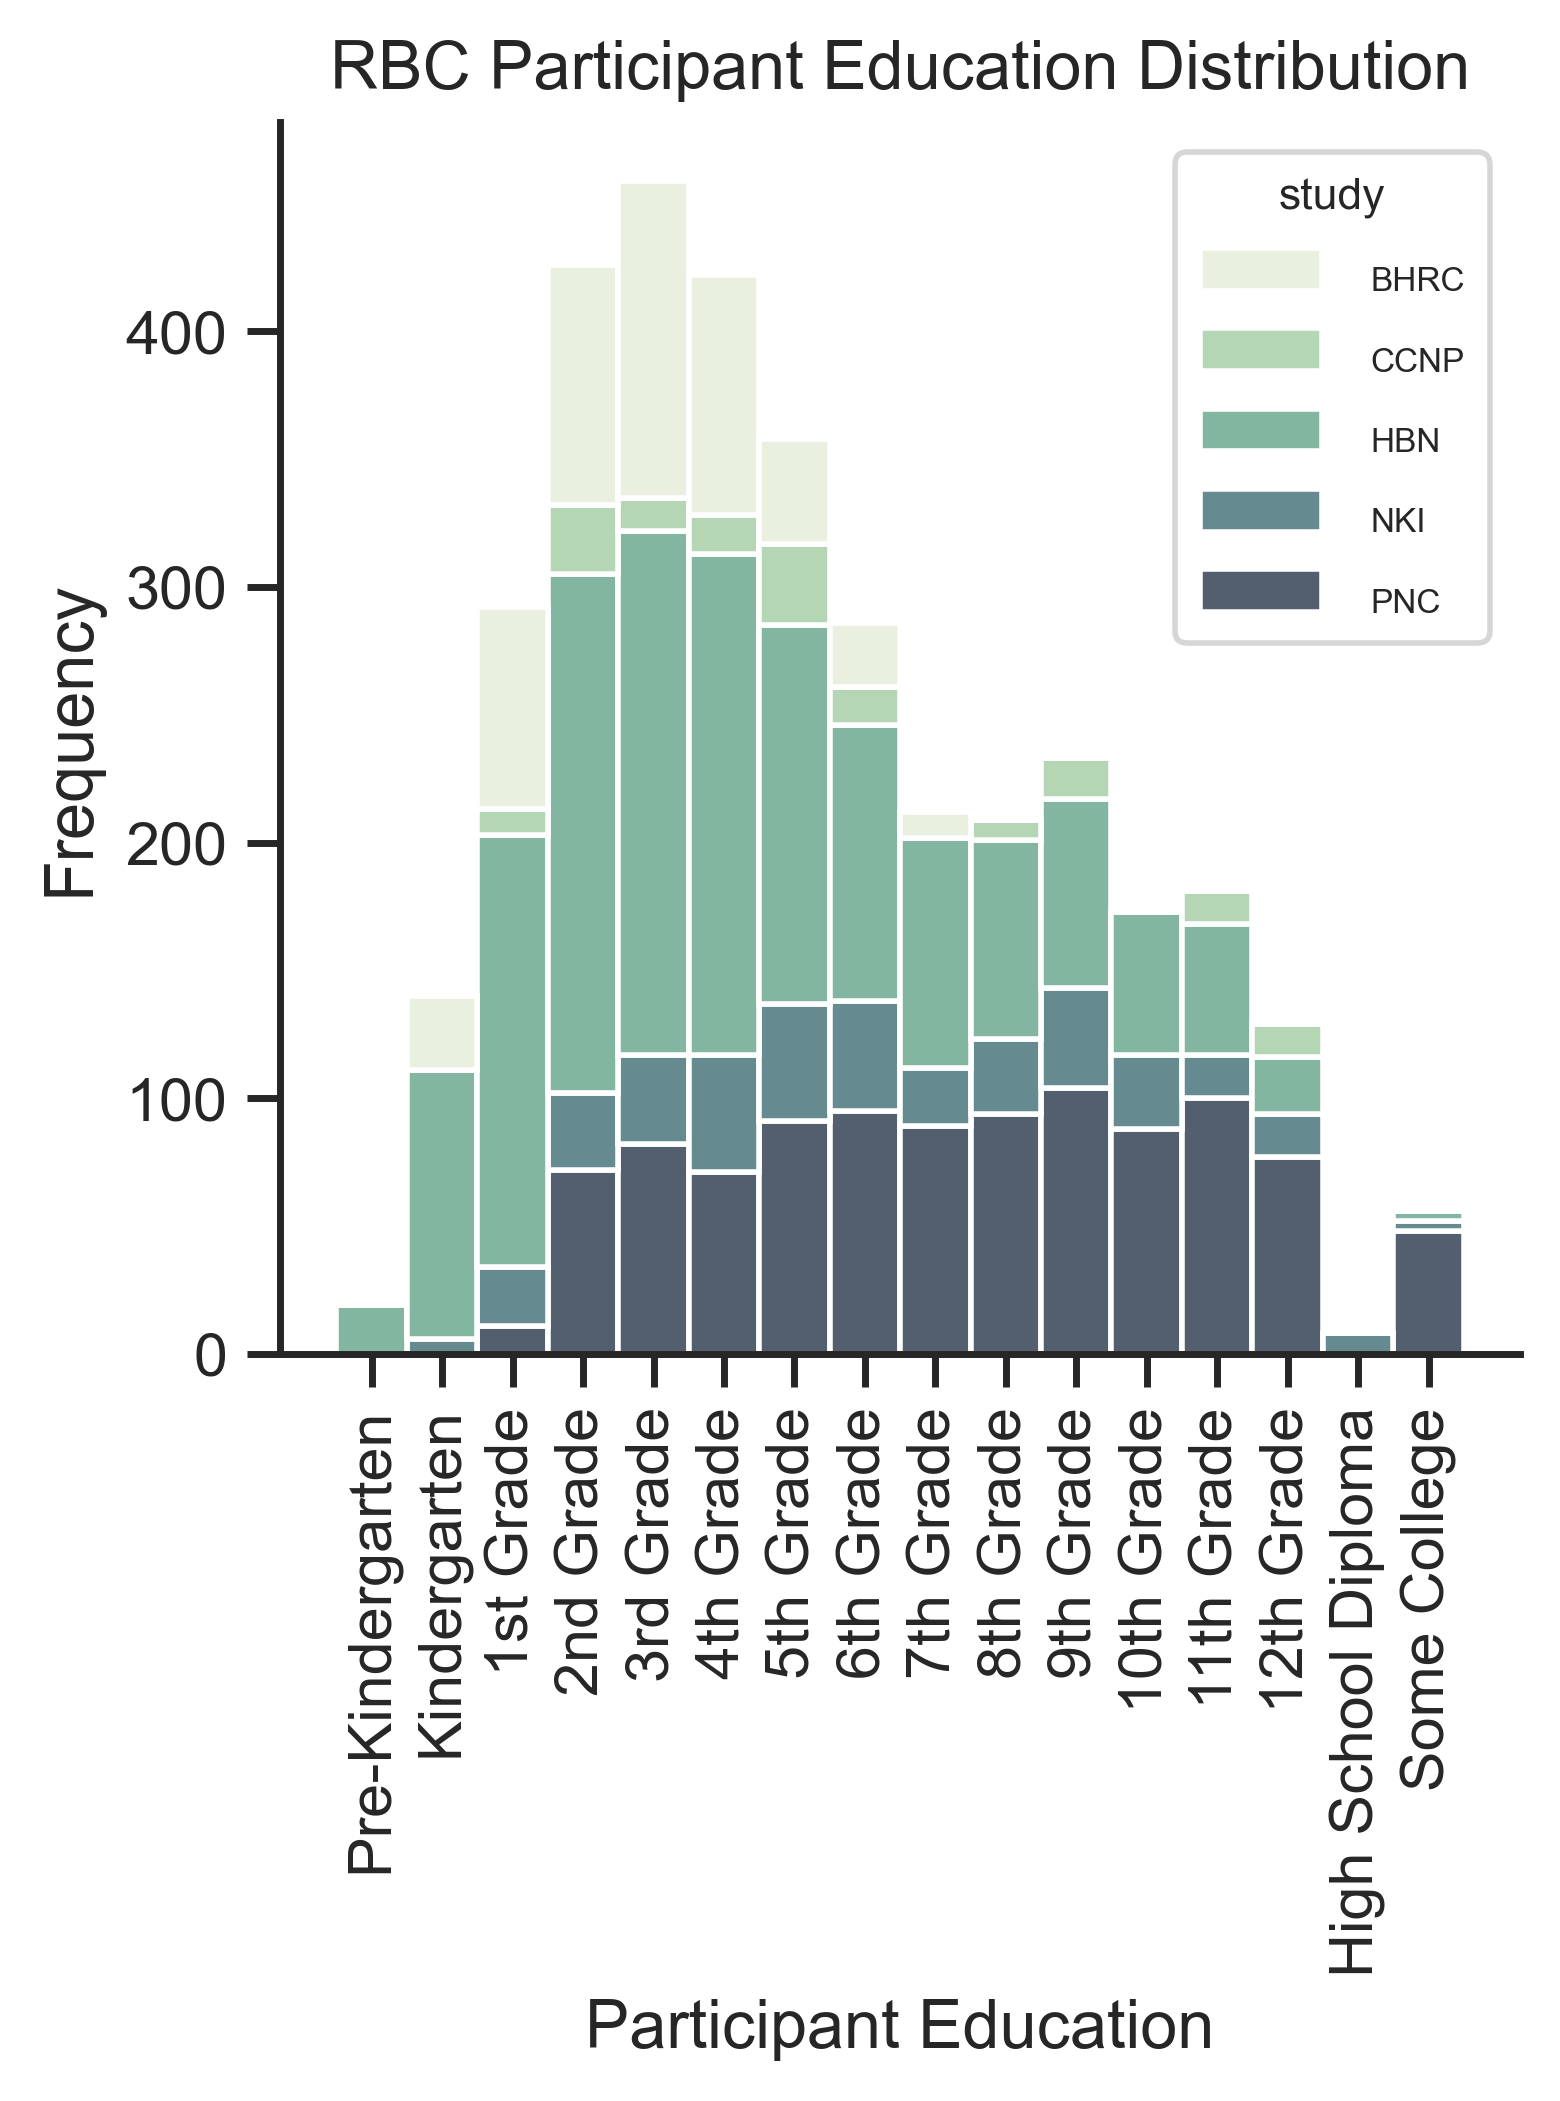

In [165]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=400)
df['participant_education'] = pd.Categorical(df['participant_education'], ['Pre-Kindergarten','Kindergarten','1st Grade', '2nd Grade', '3rd Grade',
    '4th Grade', '5th Grade', '6th Grade', '7th Grade', '8th Grade','9th Grade', '10th Grade', '11th Grade', '12th Grade', 'High School Diploma',
    'Some College'])
x = sns.histplot(
    df.dropna(),
    x='participant_education',
    hue='study',
    multiple='stack',
    palette=pal[0:5],
    ax=ax,
)
plt.xticks(rotation=90, ha='center')
sns.despine(trim=False)
ax.set(xlabel='Participant Education', ylabel='Frequency', title='RBC Participant Education Distribution')
legend = ax.get_legend()
legend.get_title().set_fontsize(8)
for text in legend.texts:
    text.set_fontsize(6)

fig.show()

### 8. Parent 1 Education
#### Distribution

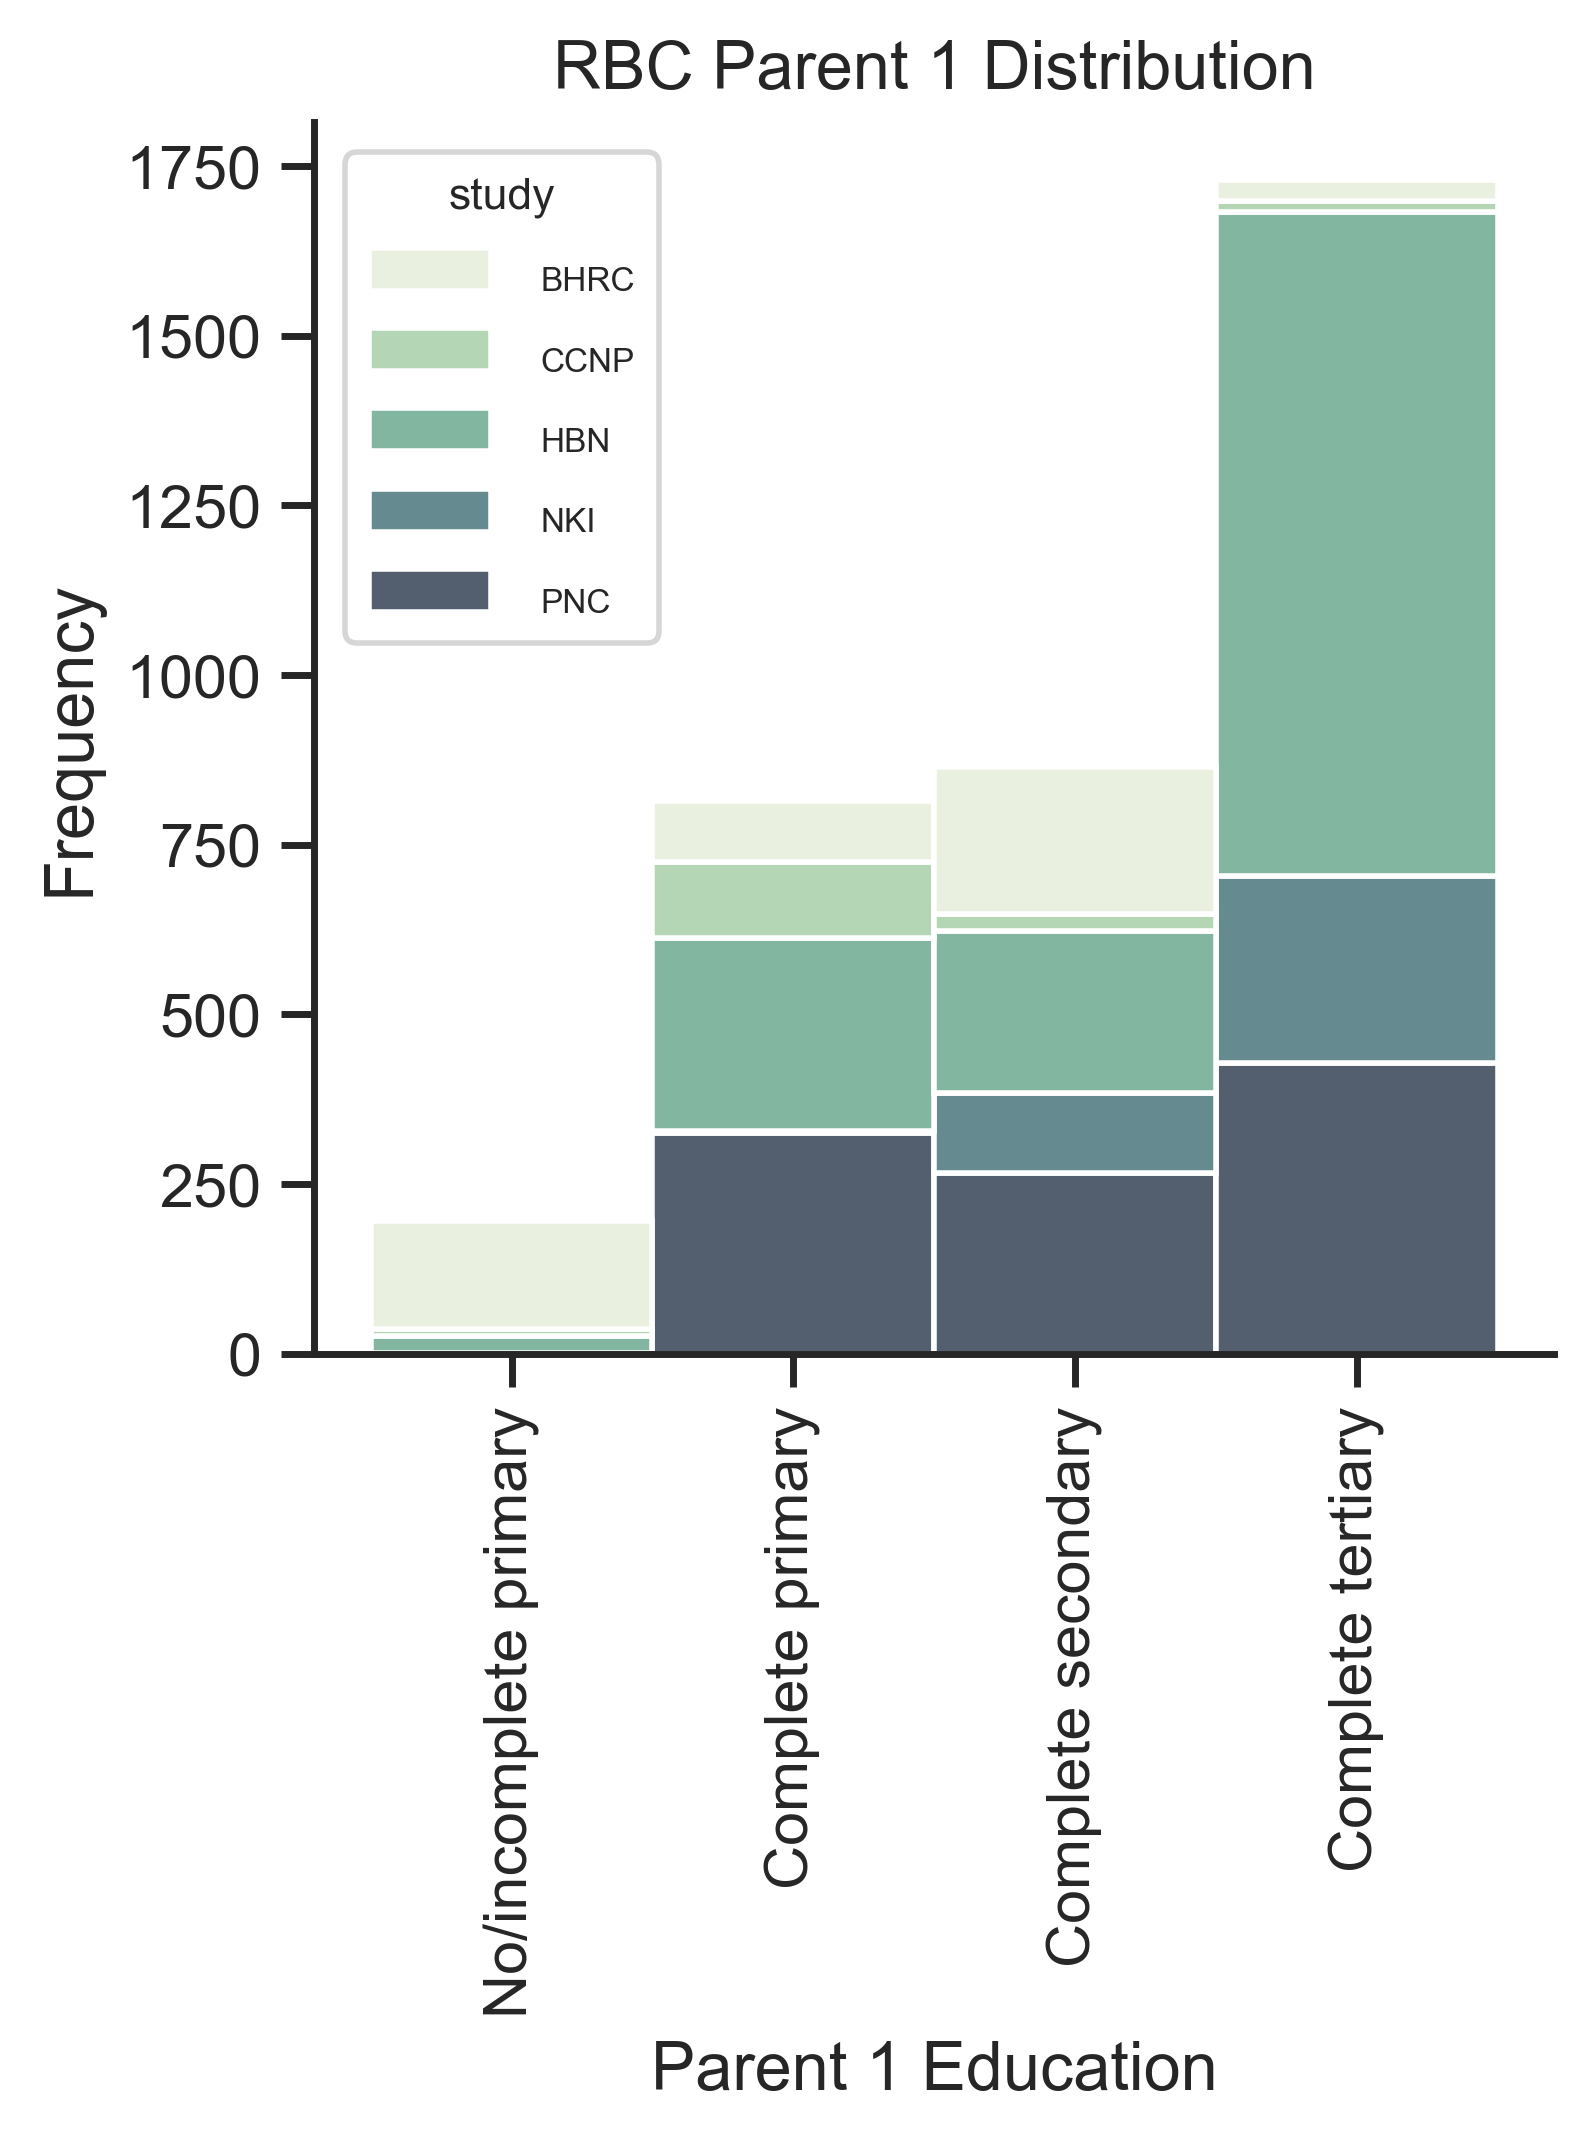

In [166]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=400)
df['parent_1_education'] = pd.Categorical(df['parent_1_education'], ['No/incomplete primary', 'Complete primary', 'Complete secondary', 'Complete tertiary'])
x = sns.histplot(
    df.dropna(),
    x='parent_1_education',
    hue='study',
    multiple='stack',
    palette=pal[0:5],
    ax=ax,
)
plt.xticks(rotation=90, ha='center')
sns.despine(trim=False)
ax.set(xlabel='Parent 1 Education', ylabel='Frequency', title='RBC Parent 1 Distribution')
legend = ax.get_legend()
legend.get_title().set_fontsize(8)
for text in legend.texts:
    text.set_fontsize(6)

fig.show()

### 9. Parent 2 Education
#### Distribution

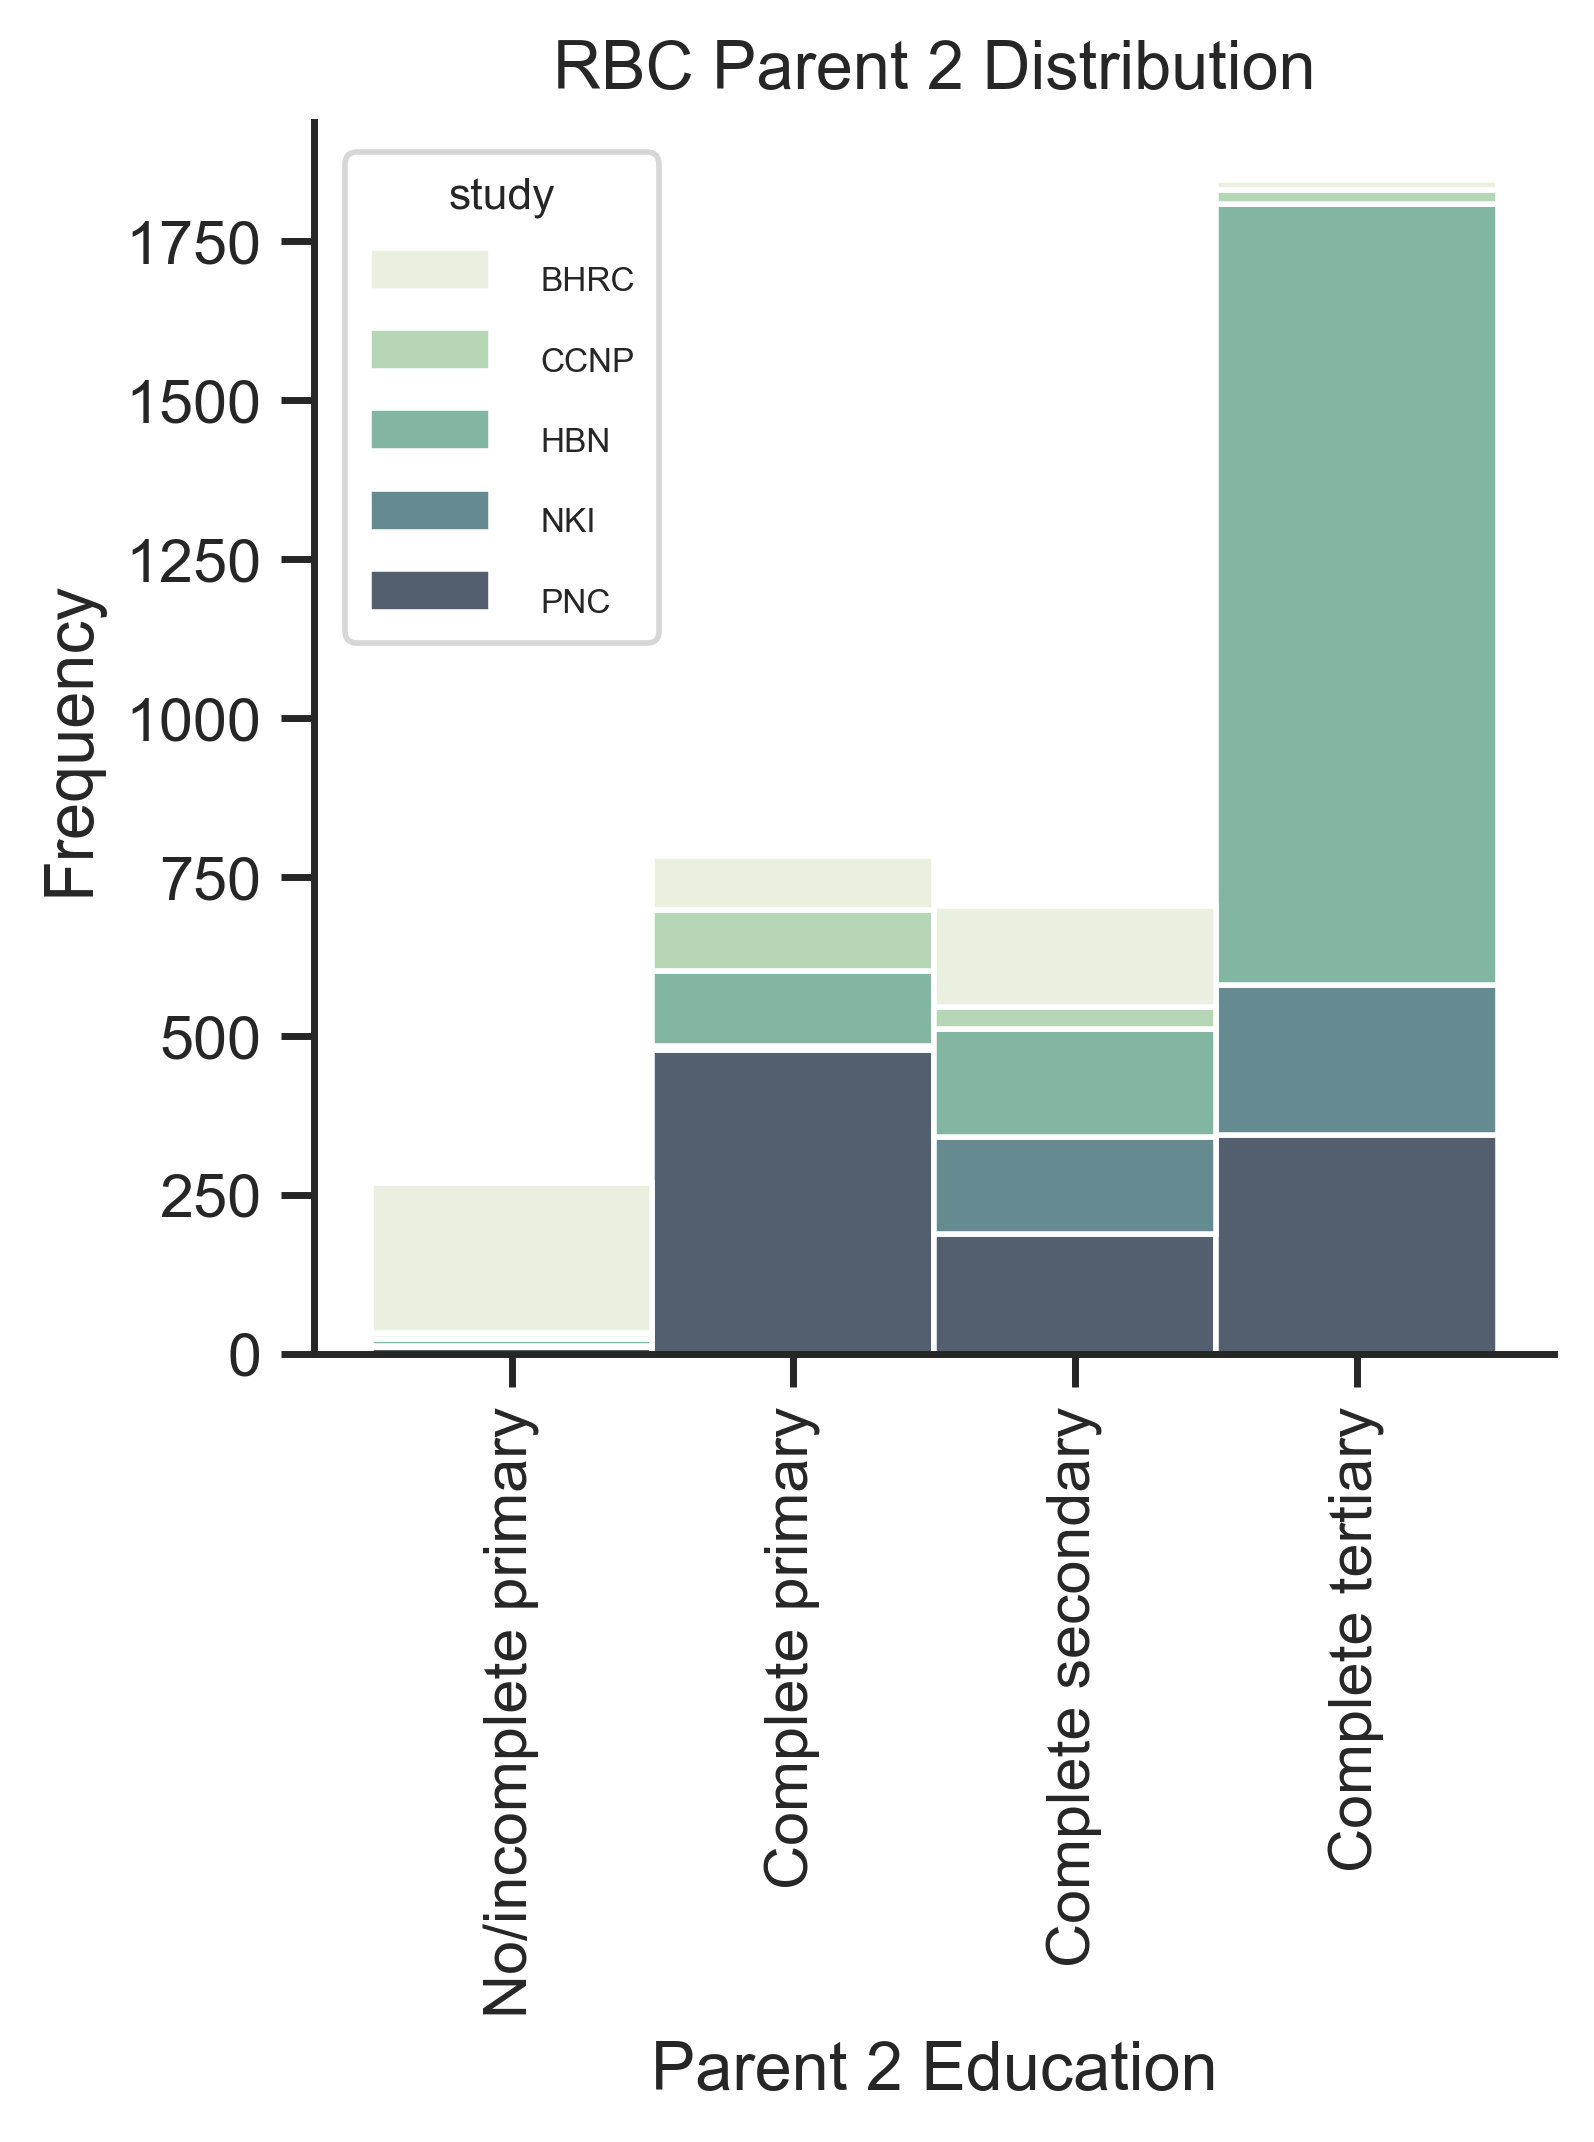

In [167]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=400)
df['parent_2_education'] = pd.Categorical(df['parent_2_education'], ['No/incomplete primary', 'Complete primary', 'Complete secondary', 'Complete tertiary'])
x = sns.histplot(
    df.dropna(),
    x='parent_2_education',
    hue='study',
    multiple='stack',
    palette=pal[0:5],
    ax=ax,
)
plt.xticks(rotation=90, ha='center')
sns.despine(trim=False)
ax.set(xlabel='Parent 2 Education', ylabel='Frequency', title='RBC Parent 2 Distribution')
legend = ax.get_legend()
legend.get_title().set_fontsize(8)
for text in legend.texts:
    text.set_fontsize(6)

fig.show()

### 10. Internalizing Factor
#### Range

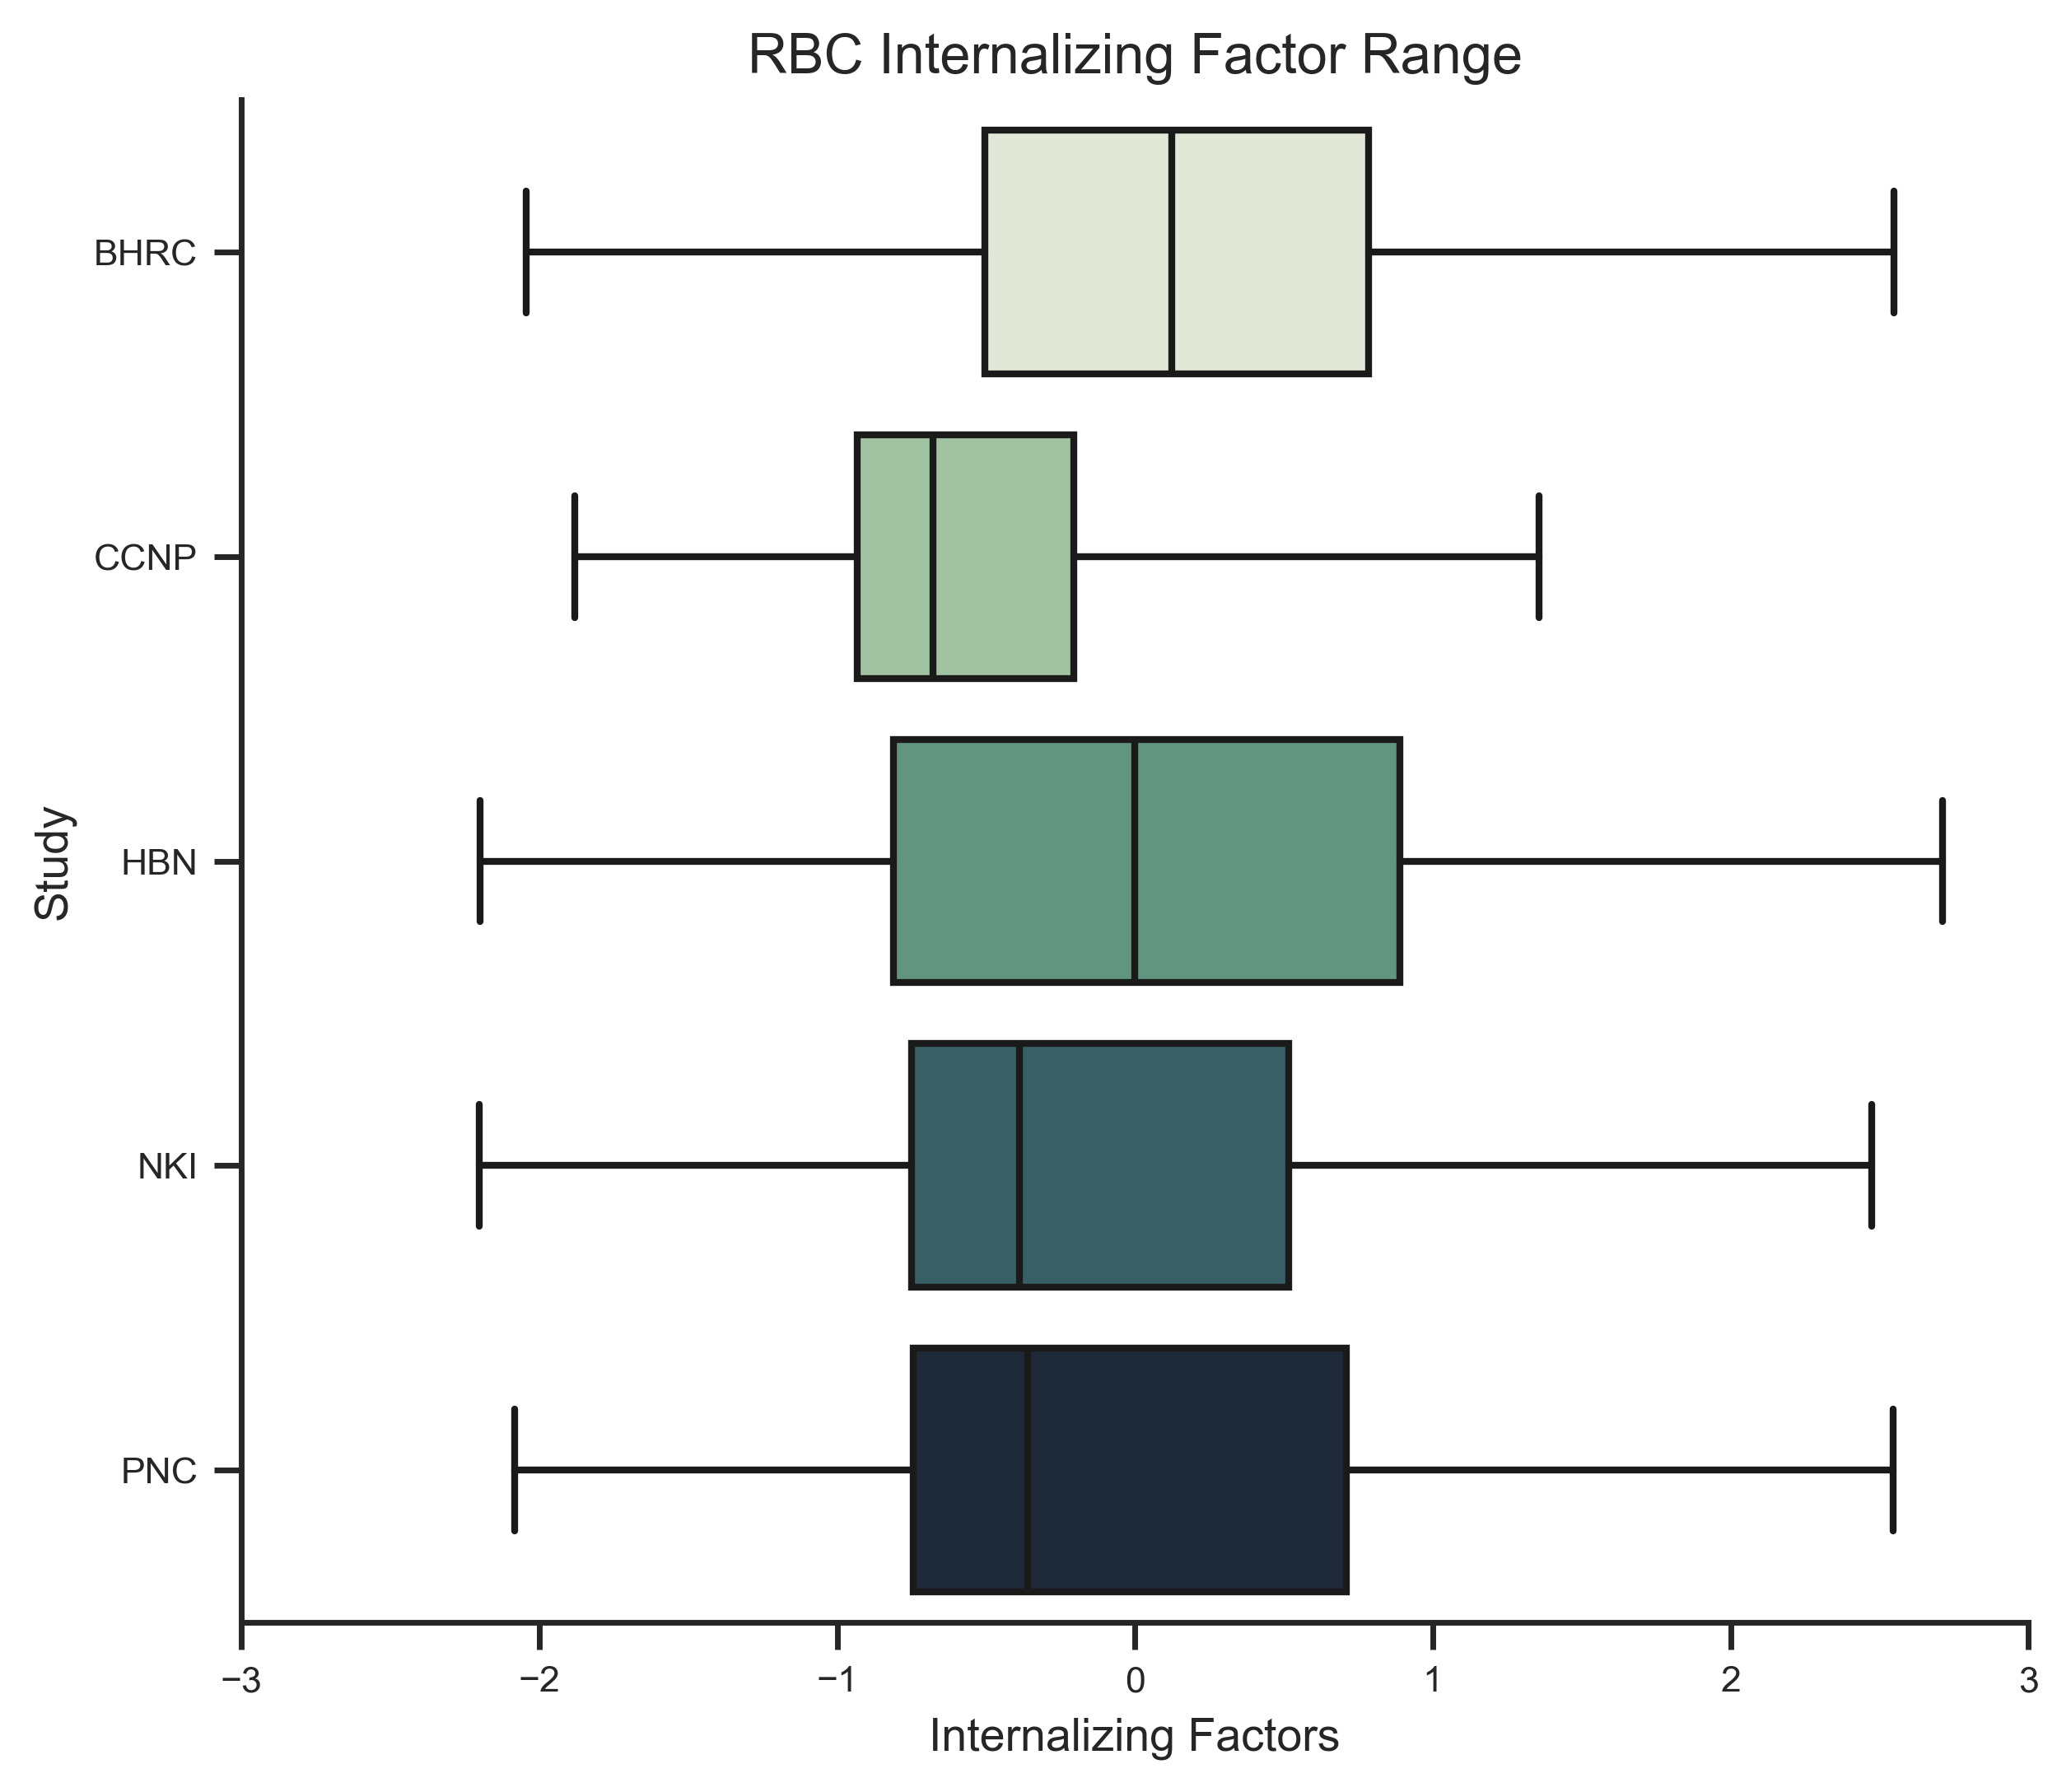

In [168]:
fig, ax = plt.subplots(figsize=(7, 6), dpi=400)

sns.boxplot(
    data=df.dropna(),
    x='internalizing_mcelroy_harmonized_all_samples',
    y='study',
    whis=[0, 100],
    width=.8,
    palette=pal,
    fliersize=8,
    ax=ax,
)

# Tweak the visual presentation
ax.set_ylabel('')
ax.set_title('RBC Internalizing Factor Range', fontsize=12)
ax.set_xlabel('Internalizing Factors', fontsize=10)
ax.set_ylabel('Study', fontsize=10)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
fig.show()

#### Distribution

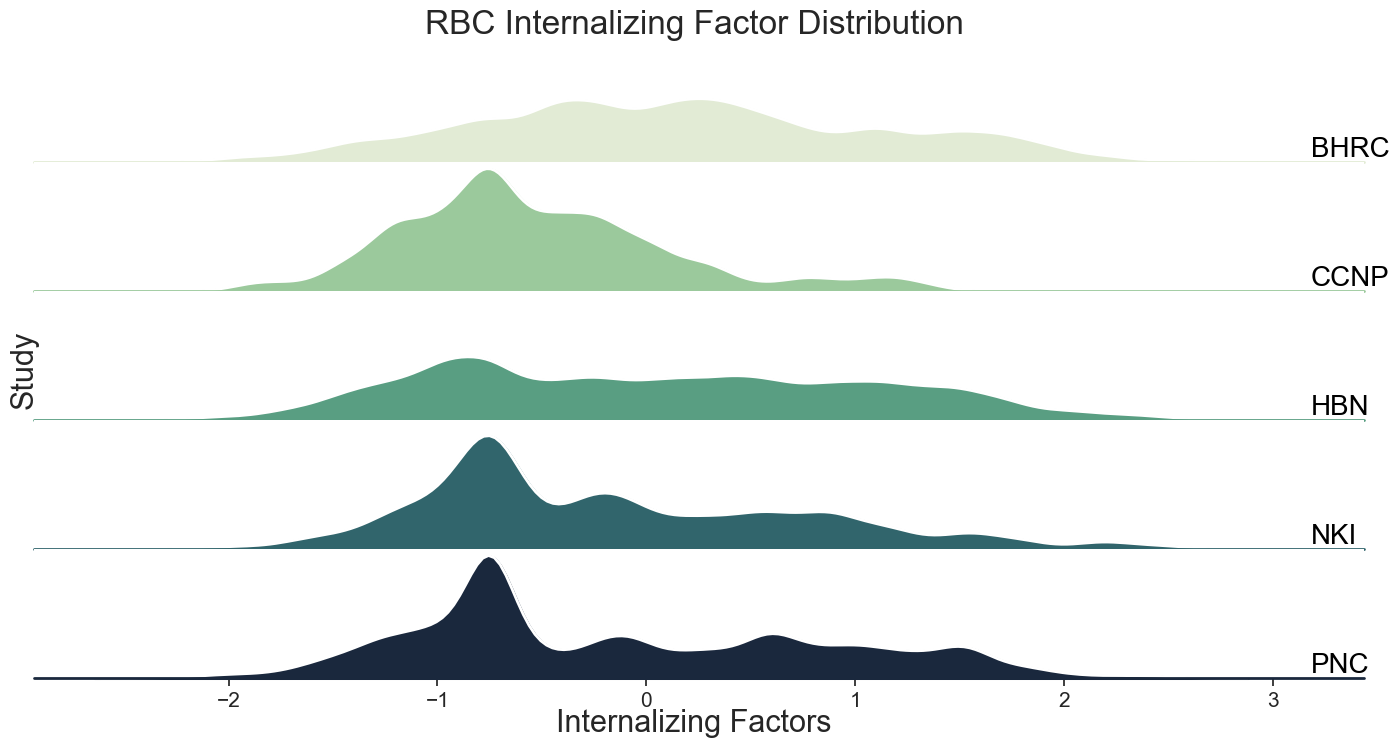

In [169]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row='study', hue='study', aspect=9.5, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    'internalizing_mcelroy_harmonized_all_samples',
    bw_adjust=.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(sns.kdeplot, 'internalizing_mcelroy_harmonized_all_samples', clip_on=False, color='w', lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.map(plt.axhline, y=0, linewidth=2, linestyle='-', color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.96,
        0.1,
        label,
        color='black',
        size=20,
        ha='left',
        va='center',
        transform=ax.transAxes,
    )

g.map(label, 'internalizing_mcelroy_harmonized_all_samples')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set(title='', yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
g.fig.suptitle('RBC Internalizing Factor Distribution', fontsize=24)
g.fig.supylabel('Study', fontsize=22)
g.fig.supxlabel('Internalizing Factors', fontsize=22)
plt.xticks(fontsize=15)
plt.show()

### 11. Externalizing Factor
#### Range

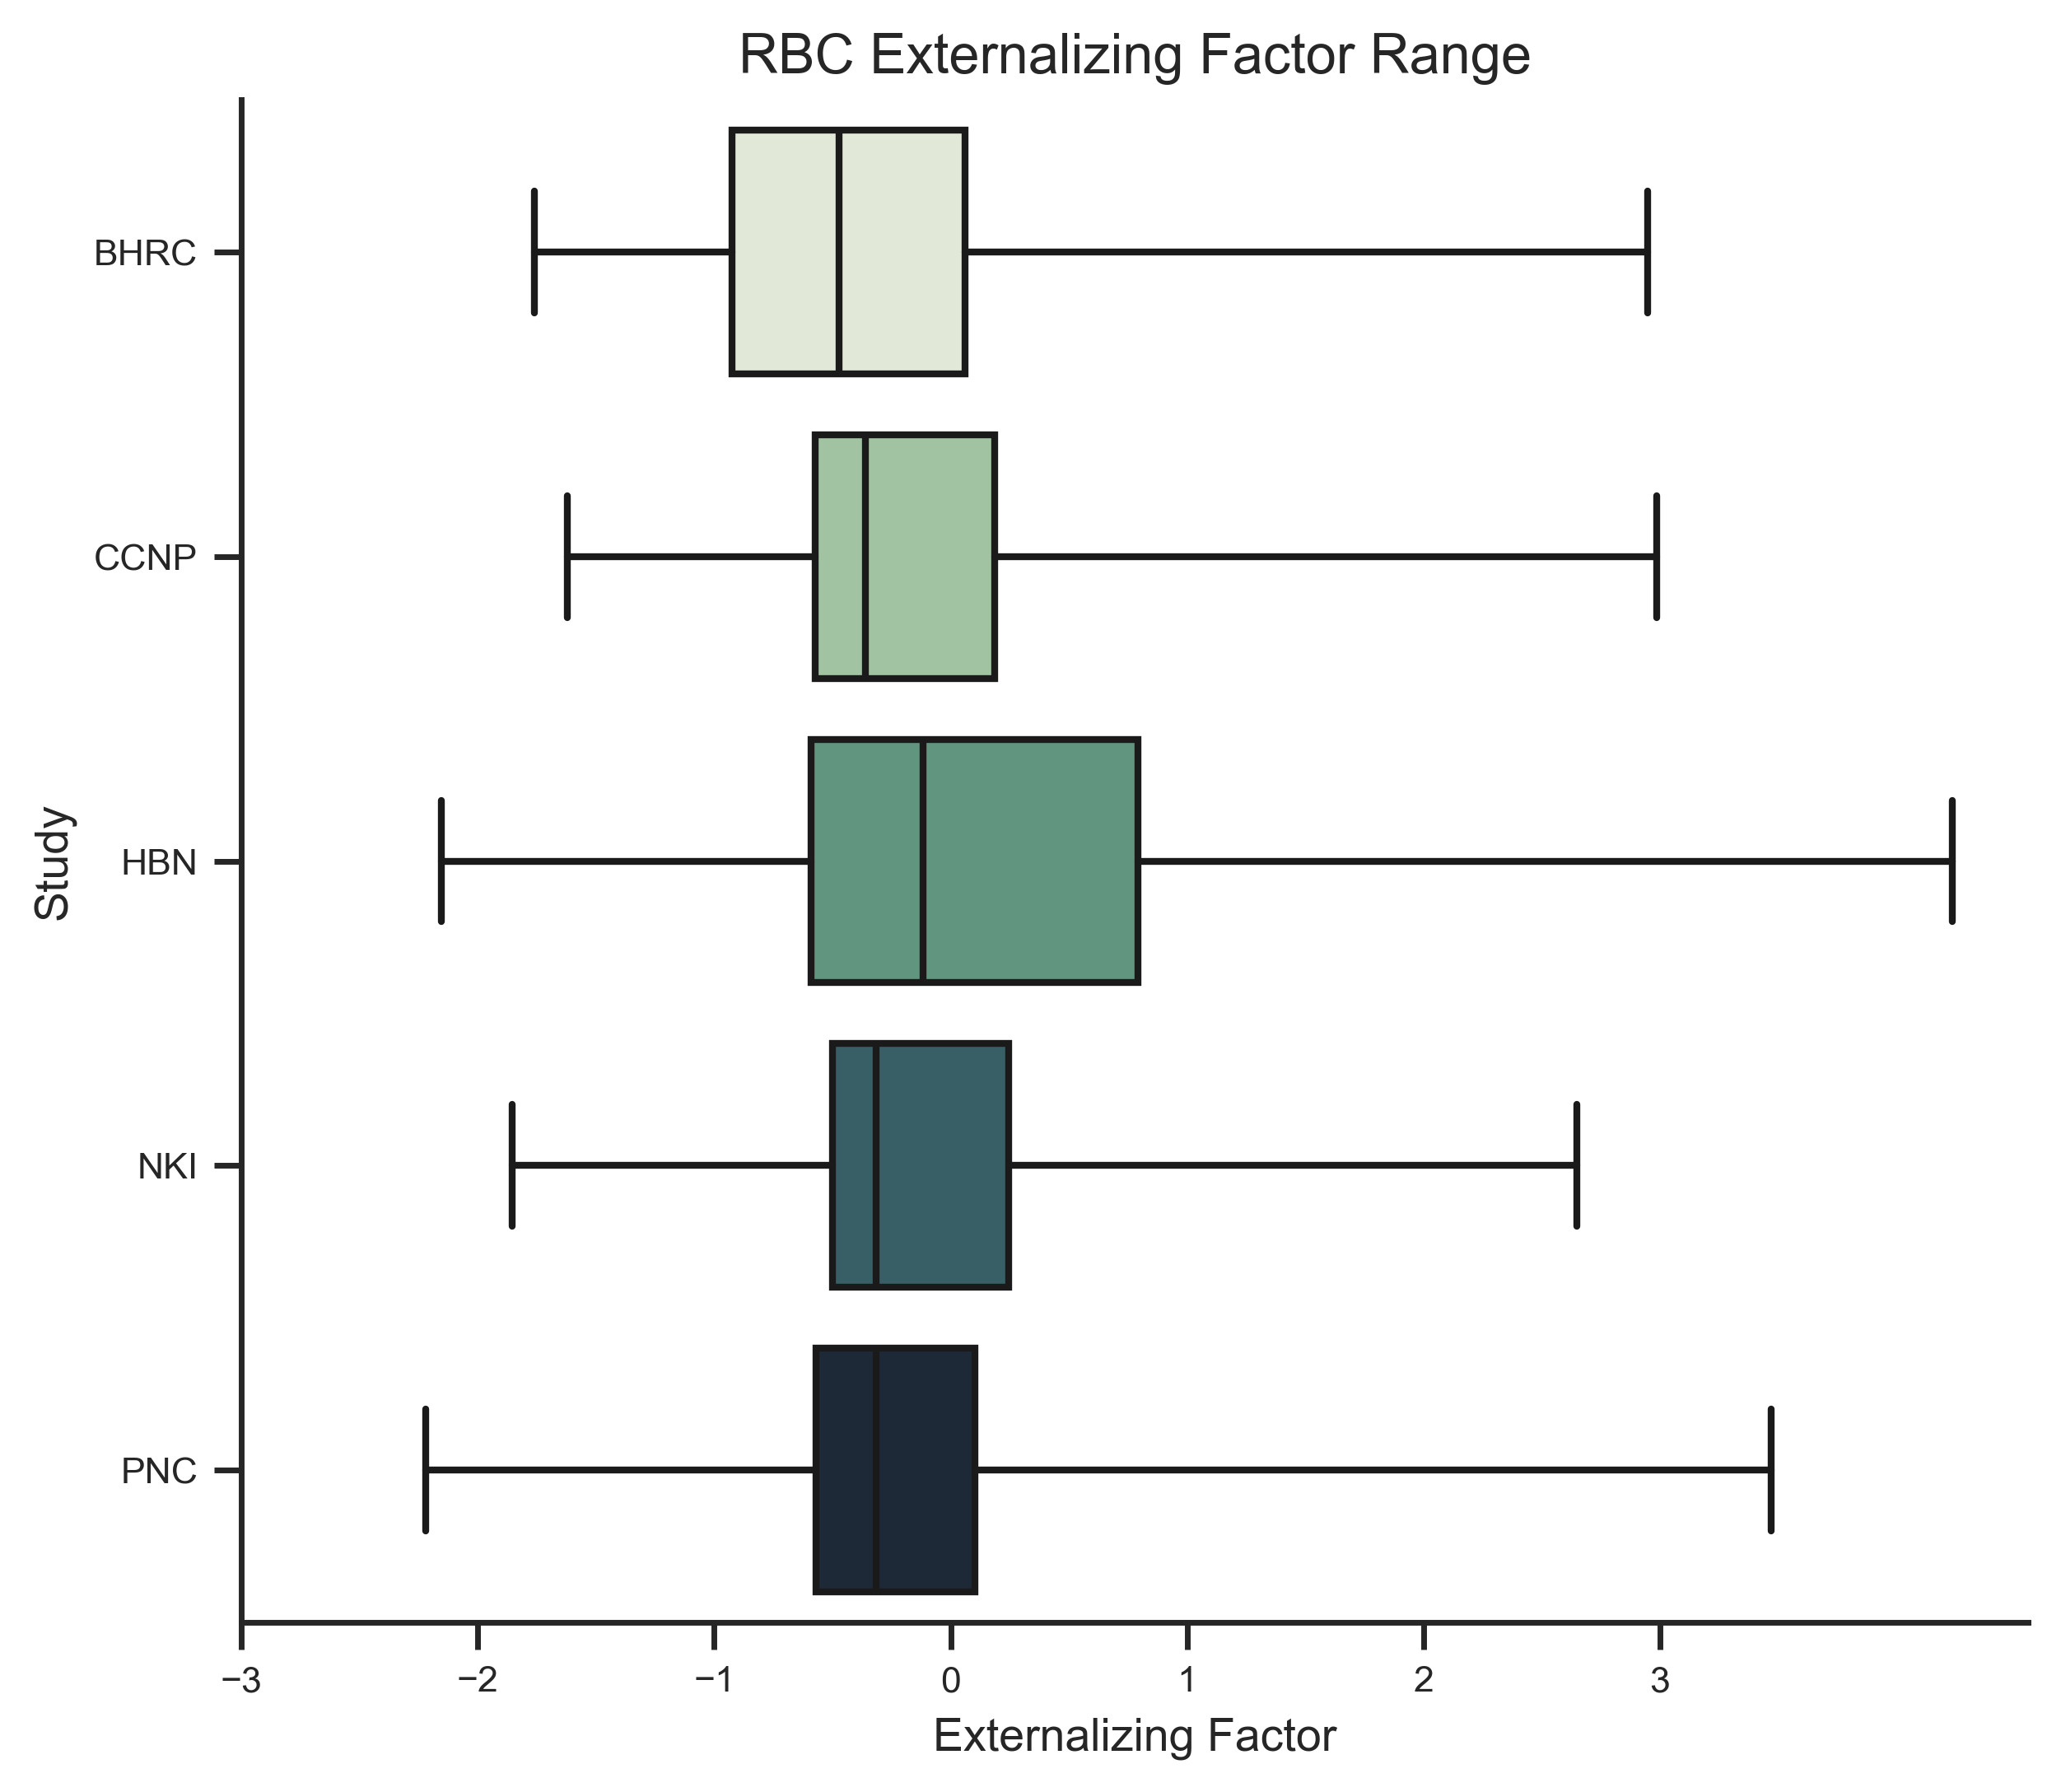

In [170]:
fig, ax = plt.subplots(figsize=(7, 6), dpi=400)

sns.boxplot(
    data=df.dropna(),
    x='externalizing_mcelroy_harmonized_all_samples',
    y='study',
    whis=[0, 100],
    width=.8,
    palette=pal,
    fliersize=8,
    ax=ax,
)

# Tweak the visual presentation
ax.set_ylabel('')
ax.set_title('RBC Externalizing Factor Range', fontsize=12)
ax.set_xlabel('Externalizing Factor', fontsize=10)
ax.set_ylabel('Study', fontsize=10)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
fig.show()

#### Distribution

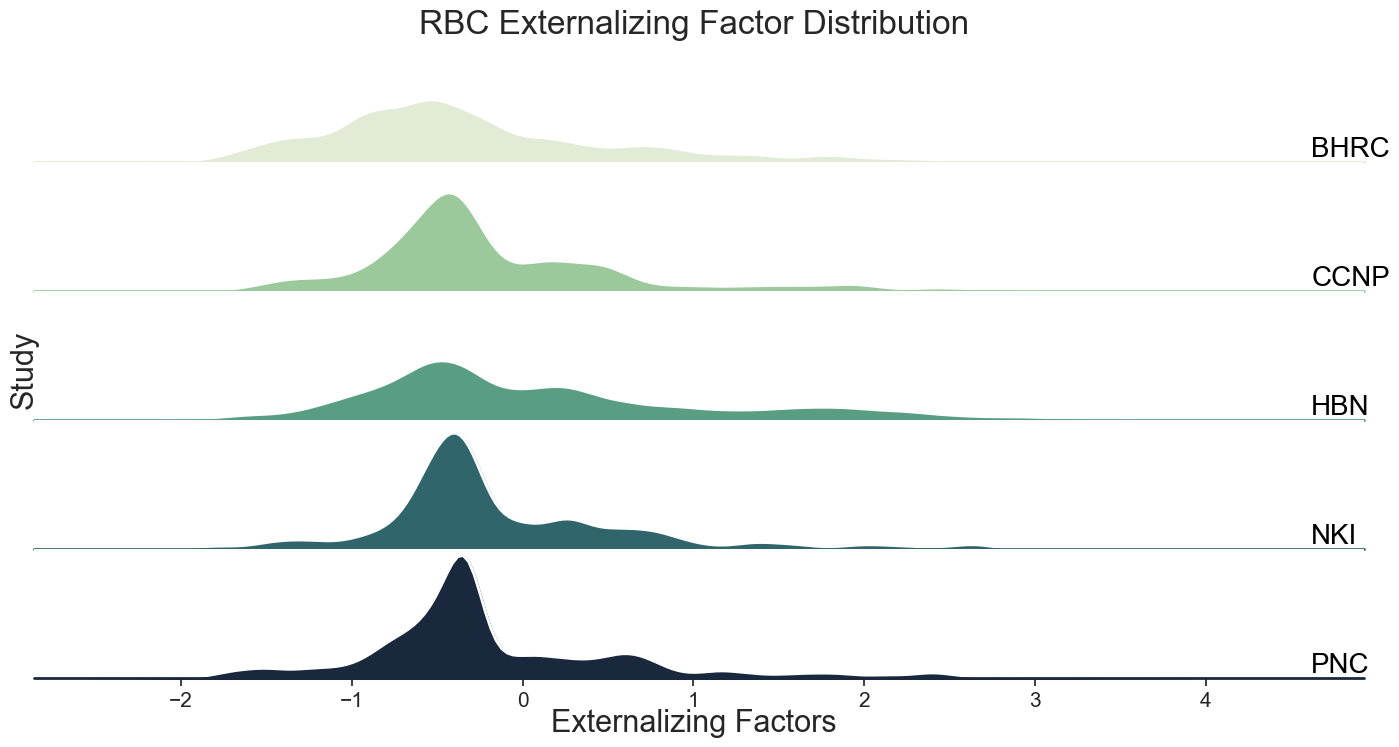

In [171]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row='study', hue='study', aspect=9.5, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    'externalizing_mcelroy_harmonized_all_samples',
    bw_adjust=.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(sns.kdeplot, 'externalizing_mcelroy_harmonized_all_samples', clip_on=False, color='w', lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.map(plt.axhline, y=0, linewidth=2, linestyle='-', color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.96,
        0.1,
        label,
        color='black',
        size=20,
        ha='left',
        va='center',
        transform=ax.transAxes,
    )

g.map(label, 'externalizing_mcelroy_harmonized_all_samples')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set(title='', yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
g.fig.suptitle('RBC Externalizing Factor Distribution', fontsize=24)
g.fig.supylabel('Study', fontsize=22)
g.fig.supxlabel('Externalizing Factors', fontsize=22)
plt.xticks(fontsize=15)
plt.show()

### 12. Attention P-Factor
#### Range

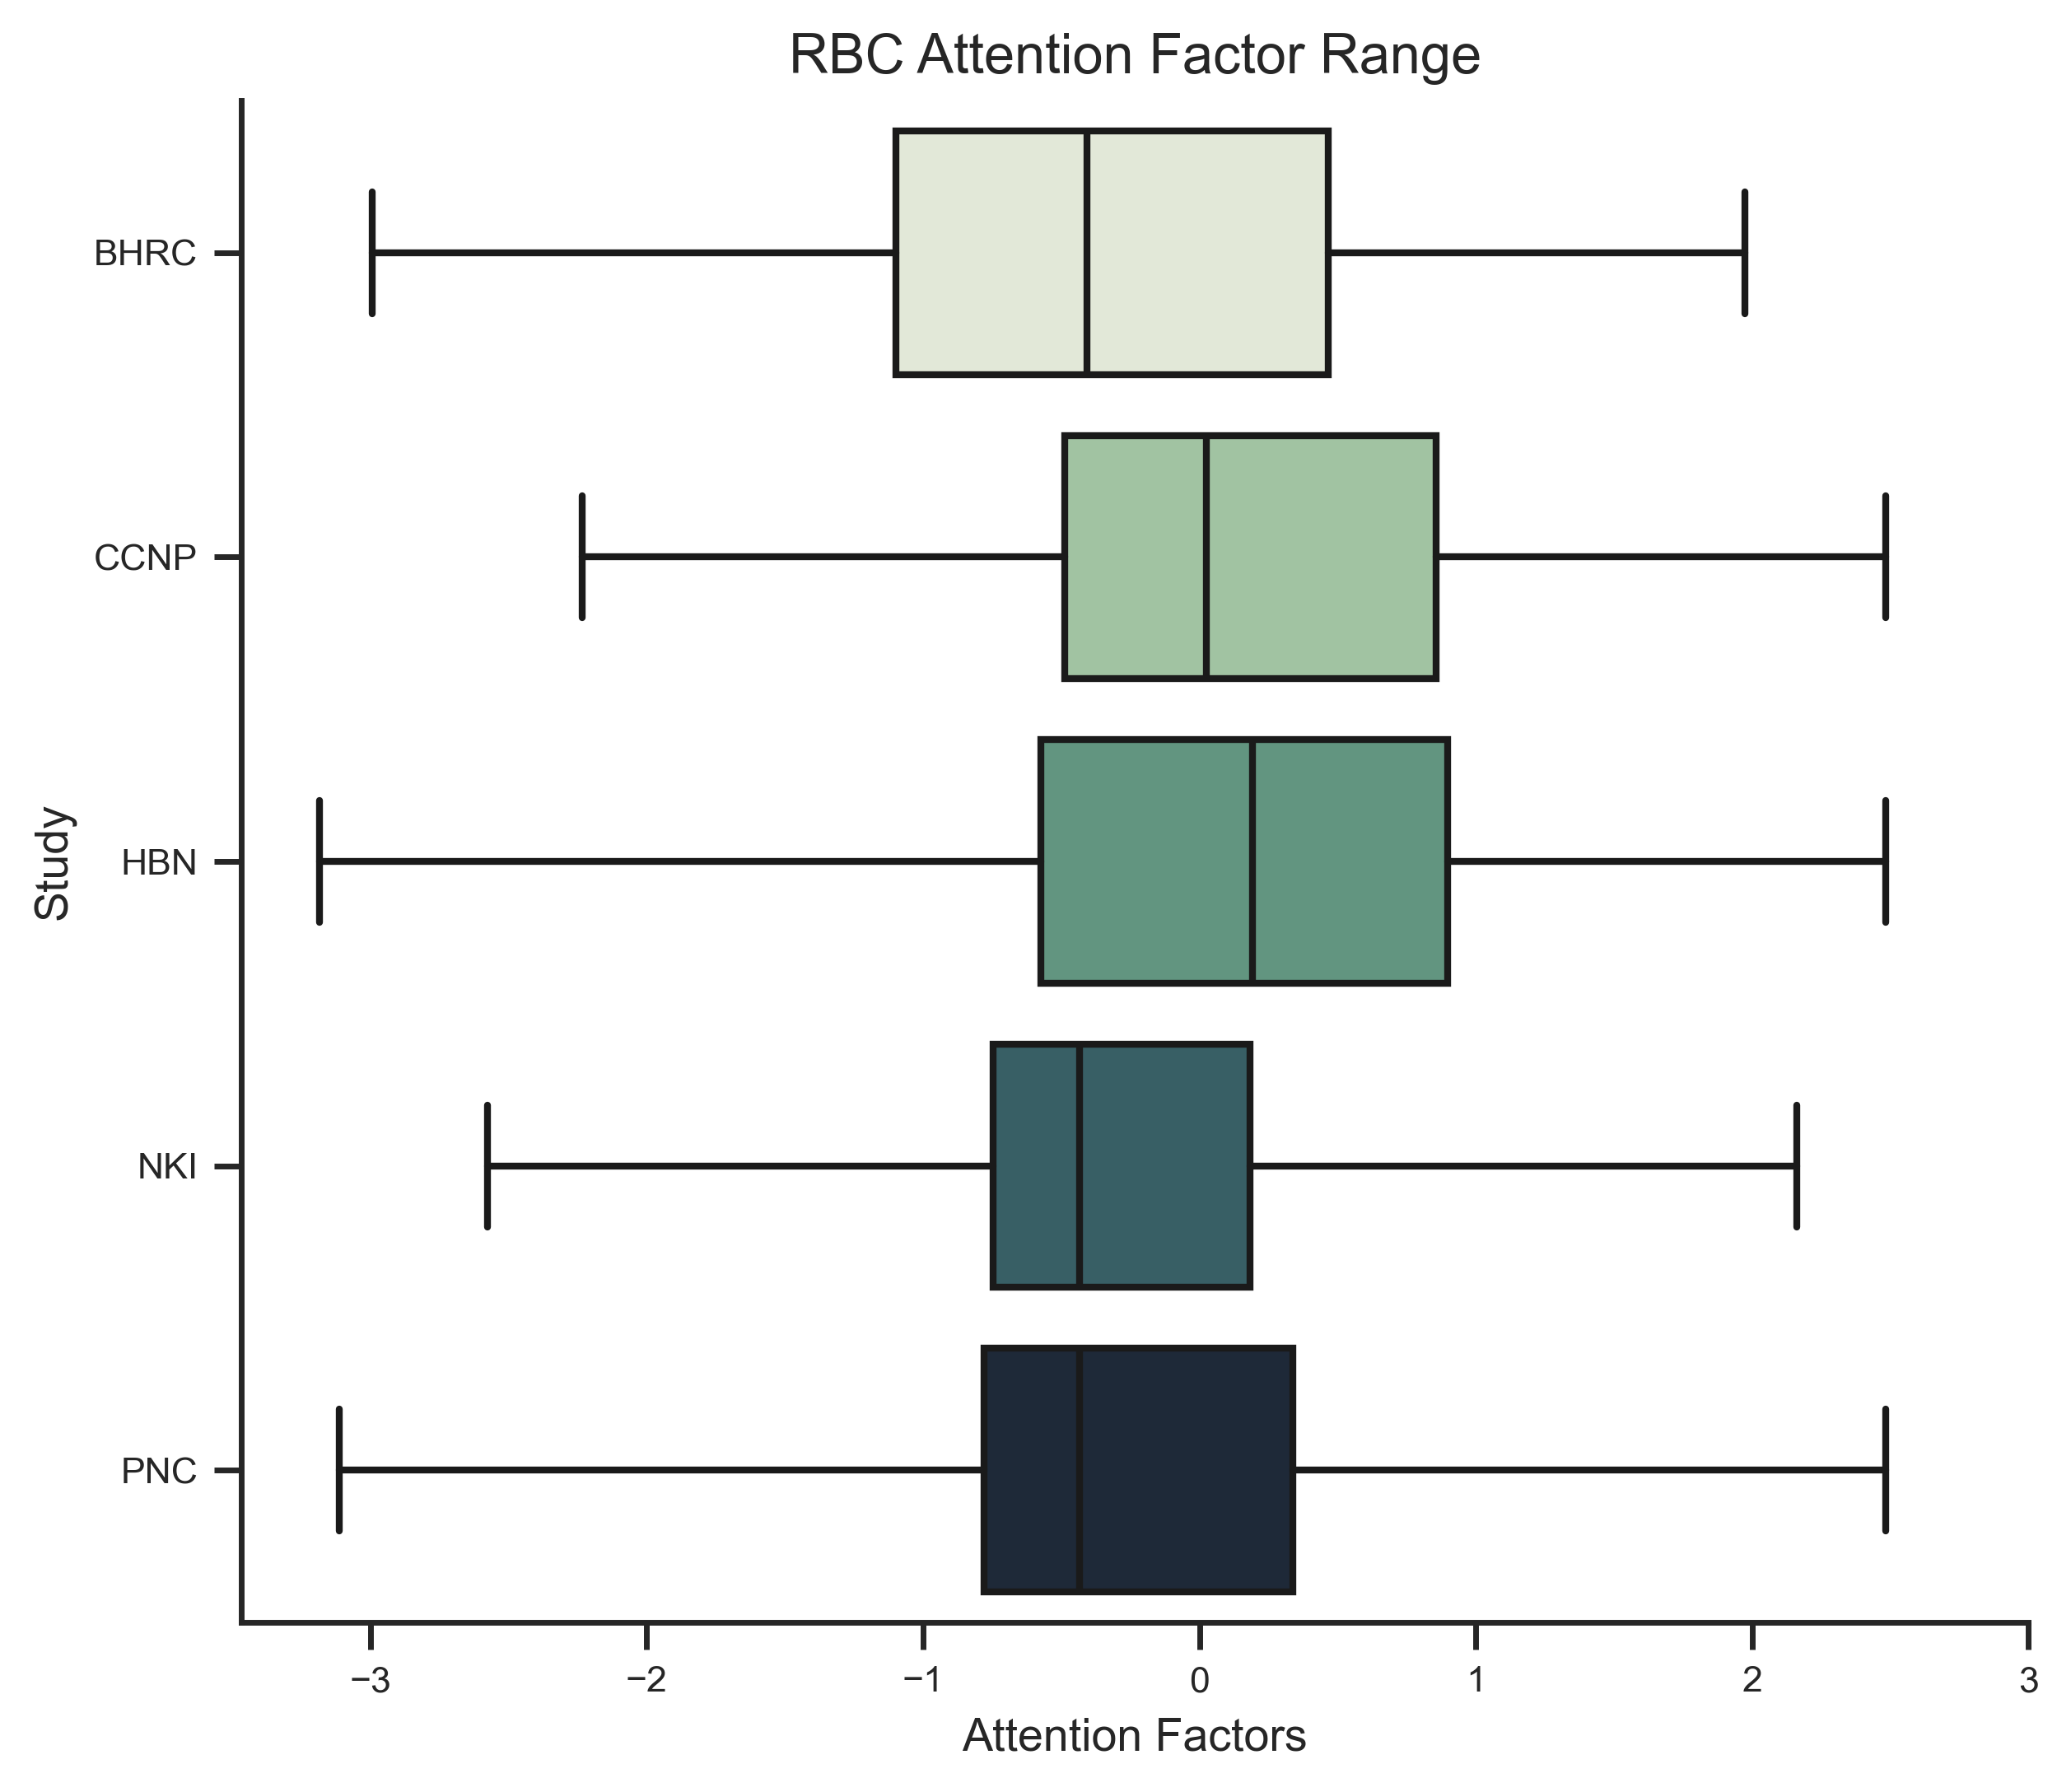

In [172]:
fig, ax = plt.subplots(figsize=(7, 6), dpi=400)

sns.boxplot(
    data=df.dropna(),
    x='attention_mcelroy_harmonized_all_samples',
    y='study',
    whis=[0, 100],
    width=.8,
    palette=pal,
    fliersize=8,
    ax=ax,
)

# Tweak the visual presentation
ax.set_ylabel('')
ax.set_title('RBC Attention Factor Range', fontsize=12)
ax.set_xlabel('Attention Factors', fontsize=10)
ax.set_ylabel('Study', fontsize=10)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
fig.show()

#### Distribution

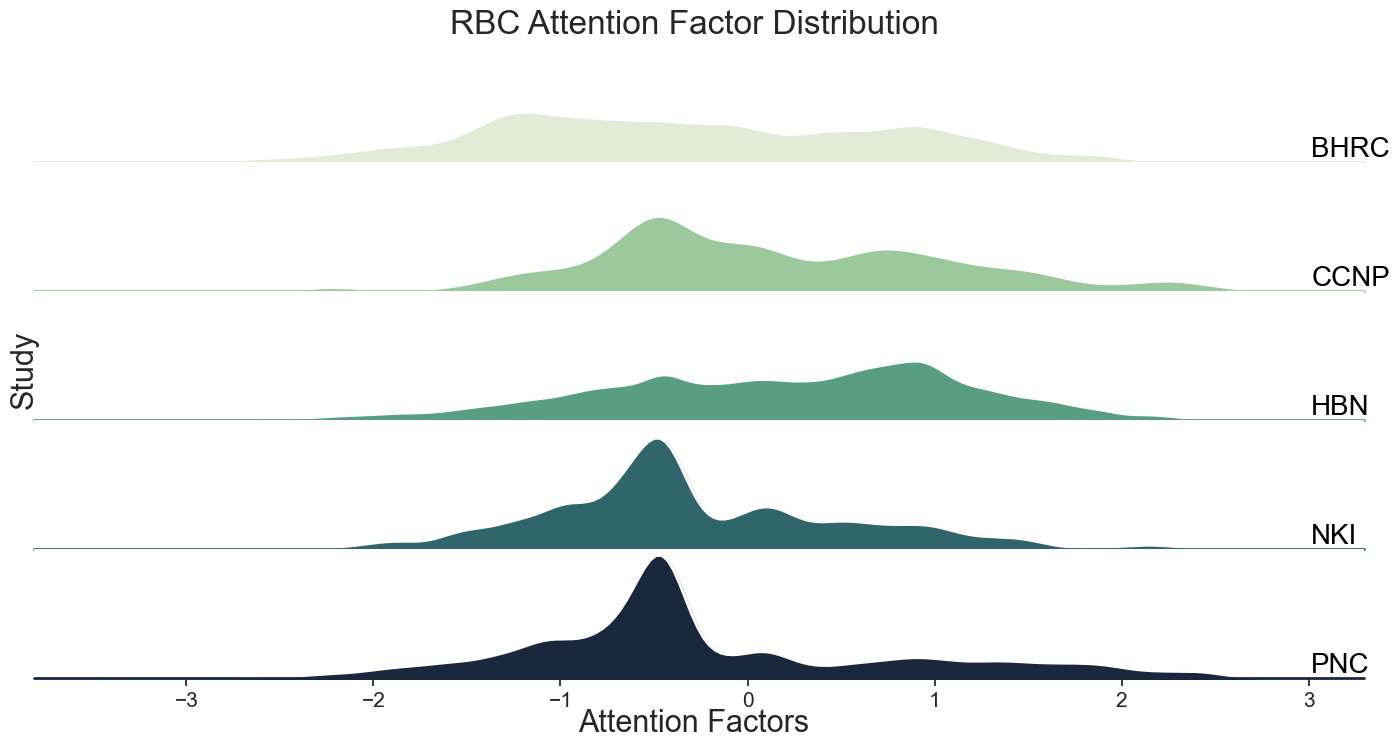

In [173]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row='study', hue='study', aspect=9.5, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    'attention_mcelroy_harmonized_all_samples',
    bw_adjust=.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(sns.kdeplot, 'attention_mcelroy_harmonized_all_samples', clip_on=False, color='w', lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.map(plt.axhline, y=0, linewidth=2, linestyle='-', color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.96,
        0.1,
        label,
        color='black',
        size=20,
        ha='left',
        va='center',
        transform=ax.transAxes,
    )

g.map(label, 'attention_mcelroy_harmonized_all_samples')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set(title='', yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
g.fig.suptitle('RBC Attention Factor Distribution', fontsize=24)
g.fig.supylabel('Study', fontsize=22)
g.fig.supxlabel('Attention Factors', fontsize=22)
plt.xticks(fontsize=15)
plt.show()

### 13. Overall P-Factor
#### Range

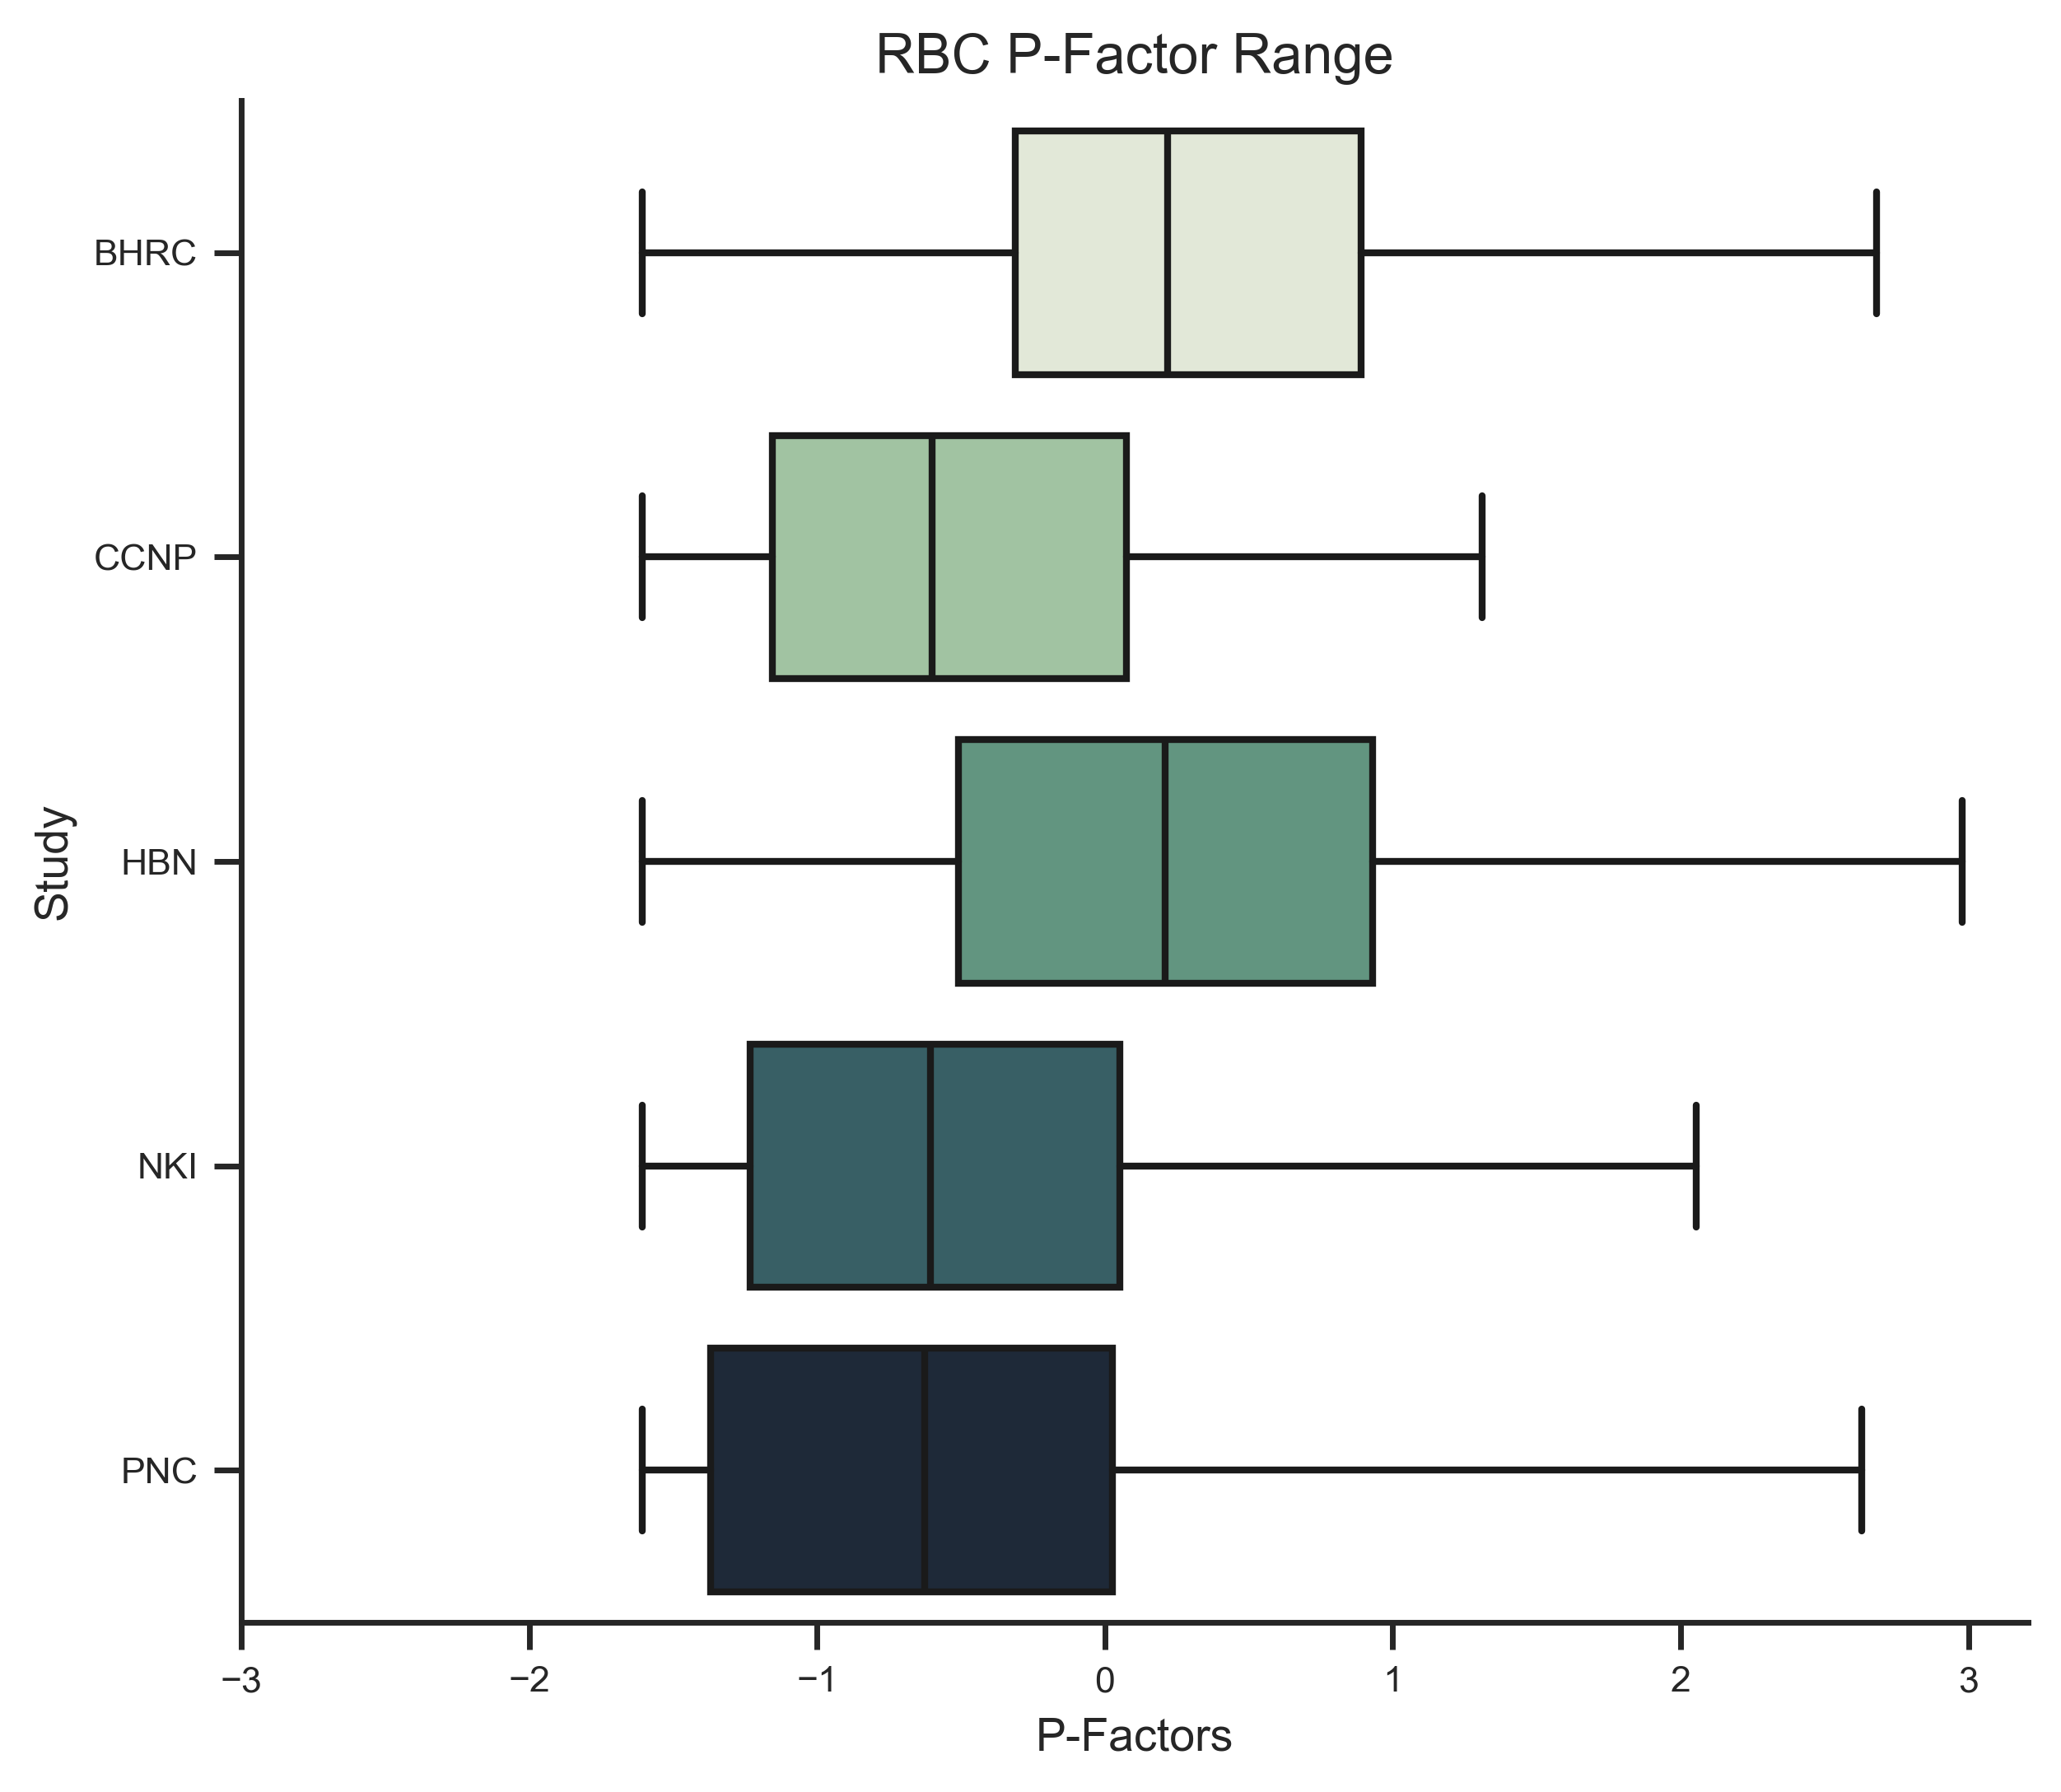

In [174]:
fig, ax = plt.subplots(figsize=(7, 6), dpi=400)

sns.boxplot(
    data=df.dropna(),
    x='p_factor_mcelroy_harmonized_all_samples',
    y='study',
    whis=[0, 100],
    width=.8,
    palette=pal,
    fliersize=8,
    ax=ax,
)

# Tweak the visual presentation
ax.set_ylabel('')
ax.set_title('RBC P-Factor Range', fontsize=12)
ax.set_xlabel('P-Factors', fontsize=10)
ax.set_ylabel('Study', fontsize=10)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
fig.show()

#### Distribution

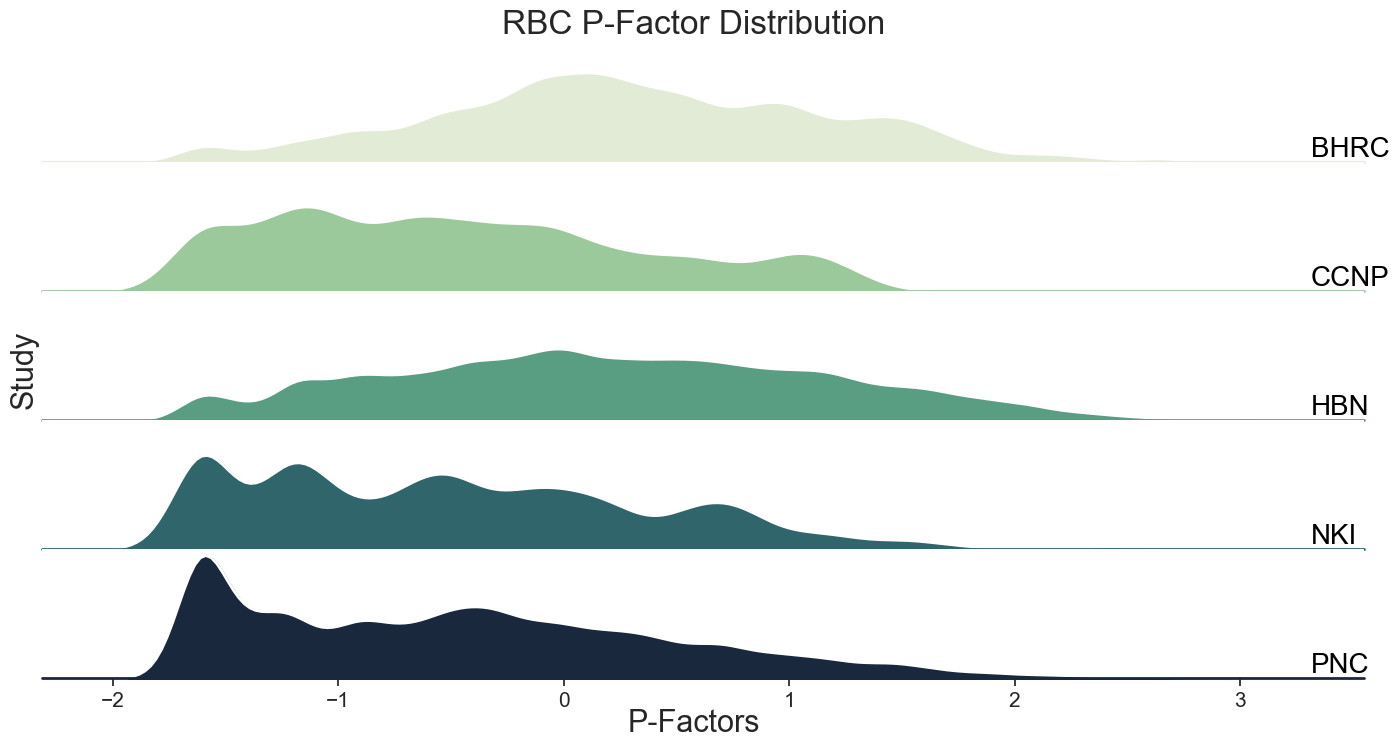

In [175]:
# Initialize the FacetGrid object
g = sns.FacetGrid(df, row='study', hue='study', aspect=9.5, height=1.5, palette=pal)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    'p_factor_mcelroy_harmonized_all_samples',
    bw_adjust=.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(sns.kdeplot, 'p_factor_mcelroy_harmonized_all_samples', clip_on=False, color='w', lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.map(plt.axhline, y=0, linewidth=2, linestyle='-', color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.96,
        0.1,
        label,
        color='black',
        size=20,
        ha='left',
        va='center',
        transform=ax.transAxes,
    )

g.map(label, 'p_factor_mcelroy_harmonized_all_samples')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=0)

# Remove axes details that don't play well with overlap
g.set(title='', yticks=[], ylabel='', xlabel='')
g.despine(bottom=True, left=True)
sns.despine(ax=ax, trim=False)
plt.tick_params(labelsize=8)
g.fig.suptitle('RBC P-Factor Distribution', fontsize=24)
g.fig.supylabel('Study', fontsize=22)
g.fig.supxlabel('P-Factors', fontsize=22)
plt.xticks(fontsize=15)
plt.show()